In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import copy
import sys
import pickle
import time
import optuna

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score, make_scorer, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import scipy.stats as scs
from scipy import interp
from sklearn.pipeline import Pipeline
from pandas import set_option

from sklearn.base import clone

from tqdm import tnrange, tqdm_notebook

import warnings
warnings.filterwarnings("ignore")

# Part A

• **DOMAIN**: Telecom

• **CONTEXT**: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

• **DATA DESCRIPTION**: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

• **PROJECT OBJECTIVE**: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

#### STEPS AND TASK

#### 1. Data Understanding & Exploration:

##### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

In [2]:
data1 = pd.read_csv('D:/Nikhila/PGP - AIML/2. Projects/3. Ensemble Techniques/TelcomCustomer-Churn_1.csv')

print('Shape of 1st Dataframe', data1.shape)
print()

print('Column Names of 1st Dataframe - ', data1.columns)

Shape of 1st Dataframe (7043, 10)

Column Names of 1st Dataframe -  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')


##### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [3]:
data2 = pd.read_csv('D:/Nikhila/PGP - AIML/2. Projects/3. Ensemble Techniques/TelcomCustomer-Churn_2.csv')

print('Shape of 2nd Dataframe', data2.shape)
print()

print('Column Names of 2nd Dataframe - ', data2.columns)

Shape of 2nd Dataframe (7043, 12)

Column Names of 2nd Dataframe -  Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


##### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [4]:
data = pd.merge(data1,data2,how='outer',on='customerID')

print('Shape of Merged Dataframe', data.shape)
print()

print('Column Names of Merged Dataframe - ', data.columns)

Shape of Merged Dataframe (7043, 21)

Column Names of Merged Dataframe -  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


##### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [5]:
#Column names from 1st dataframe
data1_columns = [['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity']]

#Column names from 2nd dataframe
data2_columns = [['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

#Combined column names from 1st & 2nd datafarme(except 'customerID')
combined_columns = [['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

#column names from merged dataframe
data_columns =[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

if (combined_columns == data_columns):
    print('All the columns are incorporated in the merged DataFrame')
else:
    print('Non-Identical column names')
    
print()

print('Shape of 1st Dataframe', data1.shape)
print()

print('Shape of 2nd Dataframe', data2.shape)
print()

print('Shape of Merged Dataframe', data.shape)

All the columns are incorporated in the merged DataFrame

Shape of 1st Dataframe (7043, 10)

Shape of 2nd Dataframe (7043, 12)

Shape of Merged Dataframe (7043, 21)


-------

#### 2. Data Cleaning & Analysis:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation** - We have some columns which are categorical type & Float type stored as object.

##### A. Impute missing/unexpected values in the DataFrame.

In [7]:
#Check for unexpected values for 'TotalCharges' as it is stored as object.

#data['TotalCharges'] = pd.to_numeric(data['TotalCharges']) >>>>>> This gives error = unable to parse string " "
#which tell us that there is blank space in data. So will check for " "

len(data.loc[data['TotalCharges']==' '])

11

In [8]:
data.loc[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**Observation** - We see that 11 customers with **TotalCharges == '  '** have just signed up because **tenure = 0**.
so to deal with this,we can - 
- Change the values for 11 observations to 0 or
- Remove the 11 observations

In this case, we will replace with 0

In [9]:
data.loc[(data['TotalCharges']==' '), 'TotalCharges'] = 0

In [10]:
#Checking for missing values in dataframe
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Observation**:
- There are no missing values since we have replaced the " " values in 'TotalCharges' column to 0.
- We will check if there are missing values in categorical variables while ploting pie chart.

##### B. Make sure all the variables with continuous values are of ‘Float’ type.

[For Example: MonthlyCharges, TotalCharges]

In [11]:
data["TotalCharges"] = data.TotalCharges.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

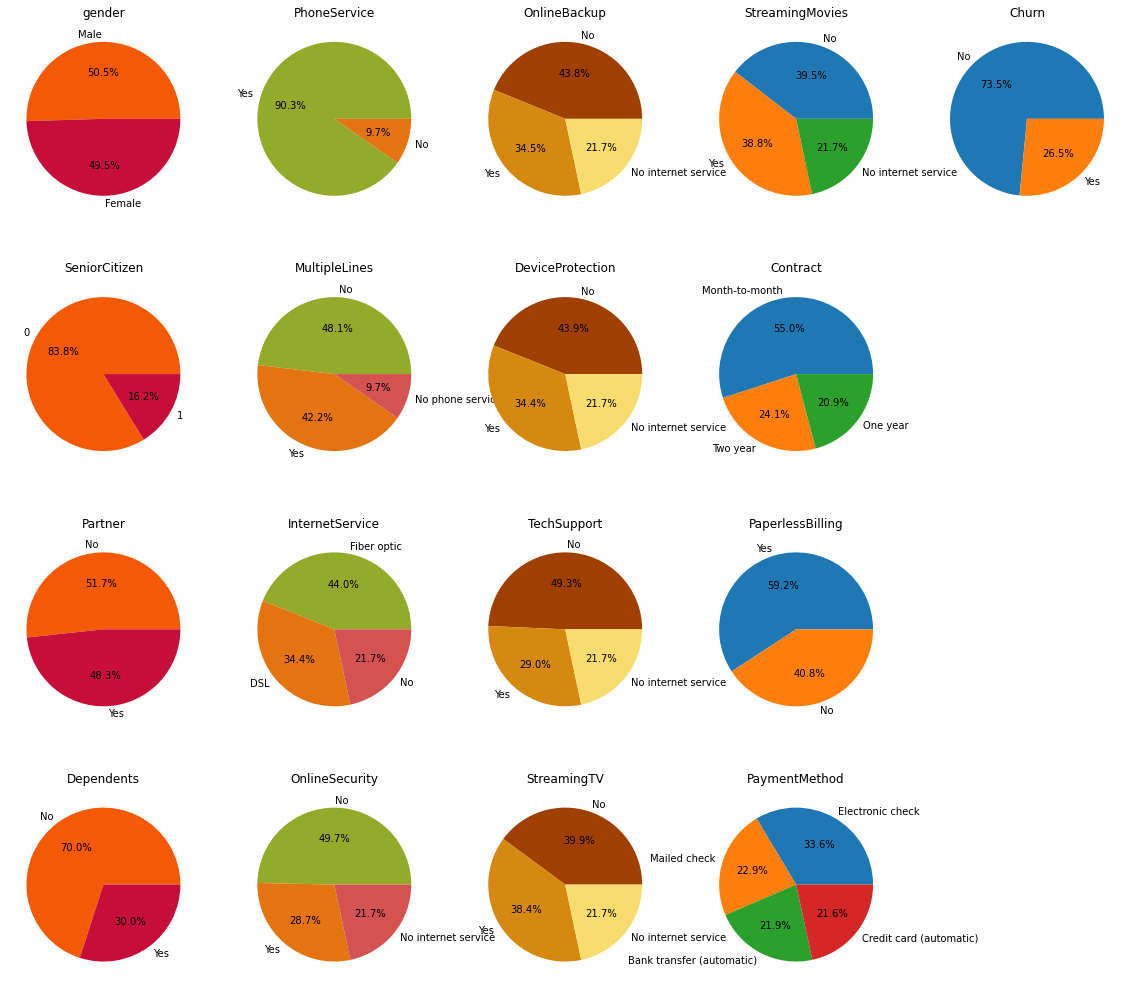

In [12]:
for col in ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'Contract','PaperlessBilling','PaymentMethod','Churn']:
    data[col] = data[col].astype('category')

features = data.columns[data.dtypes == 'category']

colors1 =['#f45905','#c70d3a','#512c62']
colors2 =['#94aa2a','#e47312','#d55252']
colors3= ['#A04000','#D68910','#F7DC6F']

fig, axes = plt.subplots(nrows = 4,ncols = 5,figsize = (20,18))

for i, item in enumerate(features):
    if i < 4:
        ax = data[item].value_counts().plot(kind = 'pie',ax=axes[i,0],rot = 0,autopct='%1.1f%%',colors=colors1,ylabel='')
        
    elif i >=4 and i <=7:
        ax = data[item].value_counts().plot(kind = 'pie',ax=axes[i-4,1],rot = 0,autopct='%1.1f%%',colors=colors2,ylabel='')
        
    elif i >=8 and i <=11:
        ax = data[item].value_counts().plot(kind = 'pie',ax=axes[i-8,2],rot = 0,autopct='%1.1f%%',colors=colors3,ylabel='')
        
    elif i >= 12 and i <=15:
        ax = data[item].value_counts().plot(kind = 'pie',ax=axes[i-12,3],rot = 0,autopct='%1.1f%%',ylabel='')
    
    elif i > 15:
        ax = data[item].value_counts().plot(kind = 'pie',ax=axes[i-16,4],rot = 0,autopct='%1.1f%%',ylabel='')
         
    ax.set_title(item)

fig.delaxes(axes[1][4])
fig.delaxes(axes[2][4])
fig.delaxes(axes[3][4])

**Observation** - There are no missing values in these category variables. But we need to clean the data before one hot encoding.

##### D. Share insights for Q2.c.

**Gender** - **Customers are equally both Male and Female**(~approx)
- Male: 50.5%
- Female: 49.5%  

**SeniorCitizen** - **Most of the customers are not Senior Citizens**
- They are senior citizen: 16.2%
- Not senior citizen: 83.8% 

**Partner** - **Customers have patners and dont have patners**(~approx same)
- Have Partner: 48.3%
- Dont have Patner:  51.7%

**Dependents** - **Most of the customers dont have dependents**
- Have Dependents: 30%
- Dont have Dependants: 70%

**PhoneService** - **Most of the customers had signed up for PhoneService**
- Signed up for PhoneService: 90.3%
- Dint Sign up for PhoneService: 9.7%

**MultipleLines** - **Most of the customers dint Sign up for MultipleLines**
- Signed up for MultipleLines: 42.2%
- Dint Sign up for MultipleLines: 48.1% + 9.7% = 57.8%

**InternetService** - **Most of the customers had InternetService(DSL + Fiber Optic)**
- DSL: 34.4%
- Fiber optic: 44%
- No InternetService: 21.7%

**OnlineSecurity** - **Most of the customers dint Sign up for OnlineSecurity**
- Signed up for OnlineSecurity: 28.7%
- Dint Sign up for OnlineSecurity: 49.7% + 21.7%(No InternetService) = 71.4%

**OnlineBackup** - **Most of the customers dint Sign up for OnlineBackup**
- Signed up for OnlineBackup: 34.5%
- Dint Sign up for OnlineBackup: 43.8% + 21.7%(No InternetService) = 65.5%

**DeviceProtection**- **Most of the customers dint Sign up for DeviceProtection**
- Signed up for DeviceProtection: 34.4%
- Dint Sign up for DeviceProtection:43.9% +21.7%(No InternetService) = 65.6%

**TechSupport** - **Most of the customers dint Sign up for TechSupport**
- Signed up for TechSupport: 29%
- Dint Sign up for TechSupport:49.3% + 21.7%(No InternetService) = 71%

**StreamingTV** - **Most of the customers dint Sign up for StreamingTV**
- Signed up for StreamingTV: 38.4%
- Dint Sign up for StreamingTV: 39.9% + 21.7%(No InternetService) = 61.6%

**StreamingMovies** - **Most of the customers dint Sign up for StreamingMovies**
- Signed up for StreamingMovies: 38.8%
- Dint Sign up for StreamingMovies: 39.5% + 21.7%(No InternetService) = 61.2%

**Contract** - **Most of the customers had Month-to-month Contract**
- Month-to-month: 55%
- One year: 20.9%
- Two year: 24.1%

**PaperlessBilling** - **Most of the customers have PaperlessBilling**
- Have PaperlessBilling: 59.2%
- Dont have PaperlessBilling: 40.8%

**PaymentMethod** - **Customers have different payment methods**
- Electronic check: 33.6%
- Mailed check: 22.8%
- Bank transfer (automatic): 21.9%
- Credit card (automatic): 21.6%

**Churn** - **Most of the customers have not Churned**
- Churned Customers: 26.5%
- Not Churned Customers: 73.5%

##### E. Encode all the appropriate Categorical features with the best suitable approach.

In [13]:
#we dont need this column
data.pop('customerID')

#target variable
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

#cleaning
data['MultipleLines'].replace(['Yes','No','No phone service'],['Yes','No','No'],inplace=True)
data['OnlineSecurity'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['OnlineBackup'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['DeviceProtection'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['TechSupport'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['StreamingTV'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['StreamingMovies'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)

##### One Hot Encoding 

In [14]:
data_encoded = pd.get_dummies(data, columns =['gender','Partner','Dependents','PhoneService','MultipleLines',
                                              'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                                             'TechSupport','StreamingTV','StreamingMovies','Contract',
                                             'PaperlessBilling','PaymentMethod'])

data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [15]:
data_encoded['SeniorCitizen'] = data_encoded['SeniorCitizen'].astype('int64')

print(data_encoded.shape)
print()

data_encoded.info()

(7043, 39)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   uint8  
 6   gender_Male                              7043 non-null   uint8  
 7   Partner_No                               7043 non-null   uint8  
 8   Partner_Yes                              7043 non-null   uint8  
 9   Dependents_No                            7043 non-null   uint8  
 10  Dependents_Yes                      

##### F. Split the data into 80% train and 20% test.

In [16]:
X = data_encoded.drop(['Churn'],axis=1)     
Y = data_encoded['Churn']

print(X.shape)
print(Y.shape)

(7043, 38)
(7043,)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

##### G. Normalize/Standardize the data with the best suitable approach.

- **Normalization** is good to use when the distribution of the data does not follow a Gaussian distribution. 
All the features will have a minimum value of 0 and a maximum value of 1.
Because encoded features are already in the range between 0 to 1. So, normalization would not affect their value.


- **Standardization**, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

In [18]:
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train = norm.transform(x_train)

# transform testing dataabs
x_test = norm.transform(x_test)

--------

#### 3. Model building and Improvement:

##### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [19]:
XGB = xgb.XGBClassifier(objective= 'binary:logistic', seed =42)
XGB.fit(x_train, y_train,verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(x_test,y_test)])

[0]	validation_0-aucpr:0.61963
[1]	validation_0-aucpr:0.63651
[2]	validation_0-aucpr:0.64429
[3]	validation_0-aucpr:0.64847
[4]	validation_0-aucpr:0.65375
[5]	validation_0-aucpr:0.65825
[6]	validation_0-aucpr:0.66117
[7]	validation_0-aucpr:0.66333
[8]	validation_0-aucpr:0.66528
[9]	validation_0-aucpr:0.66534
[10]	validation_0-aucpr:0.66702
[11]	validation_0-aucpr:0.66859
[12]	validation_0-aucpr:0.66907
[13]	validation_0-aucpr:0.66779
[14]	validation_0-aucpr:0.66756
[15]	validation_0-aucpr:0.66160
[16]	validation_0-aucpr:0.66138
[17]	validation_0-aucpr:0.66146
[18]	validation_0-aucpr:0.66026
[19]	validation_0-aucpr:0.66200
[20]	validation_0-aucpr:0.66077
[21]	validation_0-aucpr:0.66087


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [20]:
print('Accuracy on Training data:',XGB.score(x_train, y_train))
print('Accuracy on Test data:',XGB.score(x_test, y_test))

Accuracy on Training data: 0.837770678026269
Accuracy on Test data: 0.8112136266855926


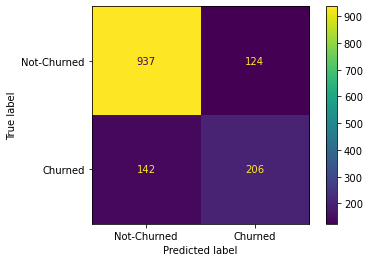

In [21]:
plot_confusion_matrix(XGB,x_test, y_test,values_format ='d', display_labels =['Not-Churned','Churned'])

**Observation** -

- True Positives (**TP**): we correctly predicted as Churned - **206**

- True Negatives (**TN**): we correctly predicted as Not-Churned - **937**

- False Positives (**FP**): we incorrectly predicted as Churned ("Type I error") - **124** 

- False Negatives (**FN**): we incorrectly predicted as Not-Churned ("Type II error") - **142**

**Accuracy** - Our model is 81.12% accurate.

**Not Churned**:
- 937 + 124 = 1061(Total)
- 937(88.3%) were correctly classified.

**Churned**:
- 142 + 206 = 348 (Total)
- 206(59.2%) were correctly classified.

**Reason**:
- Our model is bad at predicting churned customers which costs alot to the company.This might be due to imbalance data as we see the top row = 1061 and bottom row = 348 in the confusion metrix.
- The model evaluation methods do not accurately measure model performance when faced with imbalanced datasets.
- Imbalanced data will Impact/degrade the performance of the model.
- Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them.This results in a highly biased model.

**Therefore** - 
- XGboost has a parameter -'scale_pos_weight' that helps with imbalanced data.
- We will use AUC for evaluation.
- So lets try to improve predictions using **Cross Validation (GridSearchCV)** to optimize the parameters.


##### B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

In [22]:
param_grid = {'max_depth':[3,4,5], 'learning_rate':[0.1,0.01,0.05],'gamma':[0,0.25,1],
              'reg_lambda':[0,1,10],'scale_pos_weight':[1,3,5]}

#To prevent overfitting and to speed up the cross validation -
#a) We are using random subset of data (90%)
#b) We are using random subset of the feature column (50%) per tree.

optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective= 'binary:logistic',
                                seed =42,subsample=0.9,colsample_bytree=0.50),
                              param_grid=param_grid,scoring='roc_auc',verbose=0,n_jobs=10,cv=3)

In [23]:
optimal_params.fit(x_train, y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(x_test,y_test)],verbose=False,)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                    

In [24]:
#print best parameter after tuning
print(optimal_params.best_params_)

print()

#print how our model looks after hyper-parameter tuning
print(optimal_params.best_estimator_)

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10, 'scale_pos_weight': 3}

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=10, scale_pos_weight=3,
              seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [25]:
XGB = xgb.XGBClassifier(objective= 'binary:logistic', 
                        seed =42, gamma= 1, learning_rate= 0.1, 
                        max_depth= 3, reg_lambda= 10, scale_pos_weight= 3,
                       subsample=0.9,colsample_bytree=0.50)

XGB.fit(x_train, y_train,verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(x_test,y_test)])

[0]	validation_0-aucpr:0.47545
[1]	validation_0-aucpr:0.55296
[2]	validation_0-aucpr:0.57873
[3]	validation_0-aucpr:0.58594
[4]	validation_0-aucpr:0.60790
[5]	validation_0-aucpr:0.60801
[6]	validation_0-aucpr:0.61752
[7]	validation_0-aucpr:0.61920
[8]	validation_0-aucpr:0.62557
[9]	validation_0-aucpr:0.62578
[10]	validation_0-aucpr:0.62599
[11]	validation_0-aucpr:0.62927
[12]	validation_0-aucpr:0.62998
[13]	validation_0-aucpr:0.63193
[14]	validation_0-aucpr:0.63255
[15]	validation_0-aucpr:0.63206
[16]	validation_0-aucpr:0.63362
[17]	validation_0-aucpr:0.63446
[18]	validation_0-aucpr:0.63477
[19]	validation_0-aucpr:0.63608
[20]	validation_0-aucpr:0.64078
[21]	validation_0-aucpr:0.64039
[22]	validation_0-aucpr:0.64113
[23]	validation_0-aucpr:0.64106
[24]	validation_0-aucpr:0.63962
[25]	validation_0-aucpr:0.64130
[26]	validation_0-aucpr:0.64201
[27]	validation_0-aucpr:0.64393
[28]	validation_0-aucpr:0.64435
[29]	validation_0-aucpr:0.64291
[30]	validation_0-aucpr:0.64366
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=10, scale_pos_weight=3,
              seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [26]:
print('Accuracy on Training data:',XGB.score(x_train, y_train))
print('Accuracy on Test data:',XGB.score(x_test, y_test))

Accuracy on Training data: 0.756833510827121
Accuracy on Test data: 0.7366926898509581


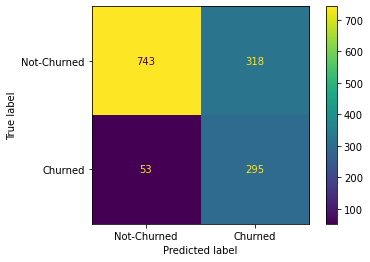

In [27]:
plot_confusion_matrix(XGB,x_test, y_test,values_format ='d', display_labels =['Not-Churned','Churned'])

**Observation** -

- True Positives (**TP**): we correctly predicted as Churned - **295**

- True Negatives (**TN**): we correctly predicted as Not-Churned - **743**

- False Positives (**FP**): we incorrectly predicted as Churned ("Type I error") - **318** 

- False Negatives (**FN**): we incorrectly predicted as Not-Churned ("Type II error") - **53**

**Accuracy** - Our model is 73.7% accurate.

**Not Churned**:
- 743 + 318 = 1061(Total)
- 743(70%) were correctly classified.

**Churned**:
- 53 + 295 = 348 (Total)
- 295(84.7%) were correctly classified.

**After Optimization** - Although accuracy has reduced from 81.12% to 73.7%, Our model is better in identifying the potential customers who have a higher probability to churn, which has increased from 59.2% to 84.7%.

 --------

# Part B

• **DOMAIN**: IT

• **CONTEXT**: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset.

• **PROJECT OBJECTIVE**: Build a machine learning workflow that will run autonomously with the csv file and return best performing model.

• **STEPS AND TASK**:
1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).
2. Create separate functions for various purposes.
3. Various base models should be trained to select the best performing model.
4. Pickle file should be saved for the best performing model.
Include best coding practices in the code:
- Modularization
- Maintainability
- Well commented code etc.

--------

**NOTE** - This a merged dataset from above example.

### Step 1 - Loading Dataset

In [28]:
data = pd.read_csv('D:/Nikhila/PGP - AIML/2. Projects/3. Ensemble Techniques/TelecomCustomer-Churn.csv')
data.shape

(7043, 21)

In [29]:
# Count the number of rows in the data
count_rows = data.shape[0]
print('Dataset contains '+str(count_rows)+' rows.')

print()

# Count the number of columns in the data
count_cols = data.shape[1]
print('Dataset contains '+str(count_cols)+' columns.')

Dataset contains 7043 rows.

Dataset contains 21 columns.


###  Data cleaning - (Optional Step- Particular to this data)

In [30]:
#Cleaning the target variable
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

#Cleaning the Independent variables
data['MultipleLines'].replace(['Yes','No','No phone service'],['Yes','No','No'],inplace=True)
data['OnlineSecurity'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['OnlineBackup'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['DeviceProtection'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['TechSupport'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['StreamingTV'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)
data['StreamingMovies'].replace(['Yes','No','No internet service'],['Yes','No','No'],inplace=True)

### Step 2 -  Pre- Requisites (Create separate functions for various purposes.)

In [31]:
                                           #INFORMATION ABOUT TARGET VARIABLE
    
#Mention the Target Column
target_col = 'Churn' 

#Mention Target column type(discrete/classification) 
#Please note - This script will not work for discrete.
classification_type = True
#-----------------------------------------------------------------------------------------------------------------------------
                                           #INFORMATION ABOUT MISSING VALUE
    
#Does dataset require missing values imputation?
miss_val_impute = True  
#-----------------------------------------------------------------------------------------------------------------------------
                                         #INFORMATION ABOUT IGNORING COLUMNS
    
#Mention if data includes any ID columns
#Although we have 'customerID', we will consider None because 'customerID' is considered in below function to ignore
any_ID_col = None 

#Mention the list of columns to ignore
ignore_col = ['customerID'] 
#-----------------------------------------------------------------------------------------------------------------------------
                                 #INFORMATION ABOUT OTHER CATEGORICAL COLUMNS IN DATASET

#Mention the list of Categorical columns in the dataset (Leave empty for 'auto-detect')
cat_col = [] 

#Auto detect the categorical columns
#Please Note - This can incorectly identified sometimes
auto_detect_cat = True

#If the number of unique values is greater than this value, the variable is assumed to be continuous
cat_threshold = 8 
#---------------------------------------------------------------------------------------------------------------------------
                                             #INFORMATION ABOUT VIZUALIZATION

#Require Heatmap for understanding correlation between variables?
generate_corr = True

#Conduct Univariate analysis?
uni_viz = True 

#Top variables for vizualization
top_var = 10
#---------------------------------------------------------------------------------------------------------------------------
                                            #INFORMATION ABOUT CROSS VALIDATION

#Mention number of cross Validations required (considered 3 for example)
cv_num = 3

#Mention the type of Cross Validation: Random (R), Stratified (S), Matched (M)
cv_type = 'S' 

#Mention the name of column used for matched type of Cross Validation.
cv_match = None 
#----------------------------------------------------------------------------------------------------------------------------
                                             #INFORMATION ABOUT SCALING
#Does data require scaling?
req_scaling = True  
#-----------------------------------------------------------------------------------------------------------------------------
                                        #INFORMATION ABOUT MACHINE LEARNING ALGORITHMS
    
#Mention the Algorithms to consider
considered_alg = ['Logistic_Regression','Decision_Tree', 'Random_Forest', 
                   'Naive_Bayes', 'XGB','SVM','Gradient_Boosting','K_Neighbors'] 

#Mention the respective color for the Algorithms considered
algColors = ['black','yellow','orange','grey','purple', 'aqua', 'blue','lightcoral']

#-----------------------------------------------------------------------------------------------------------------------------
                                           #INFORMATION ABOUT HYPER-PARAMETERS
    
#Mention the number of bayesian hyperparameter optimization trials
n_trials = 80 

#Mention the metric to be used to pick best hyperparamters
best_hyperparameter = 'balanced_accuracy' 

SEED = 7

#Internal cross validation partitions for hyperparamter
hype_cv = 3 

#Seconds until hyperparameter sweep stopped - 3600 sec = 1 hour, 300 sec = 5 min
timeout = 300 

randomSeed = 42
random.seed(randomSeed)

### Step 3 - Exploratory data analysis

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


In [35]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### Step 4 - Data Pre -Processing

### a) Checking for missing values

In [36]:
missing_count = data.isnull().sum()
missing_count

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Check the missing values in percentage

In [37]:
for i,c in enumerate(data.columns):
    missing_percent = np.sum(data[c].isnull())/len(data)*100
    if missing_percent > 0:
        print(c,'=',np.sum(data[c].isnull())/len(data)*100)

TotalCharges = 0.1561834445548772


#### Remove rows with missing values

In [38]:
print("Number of rows before removing missing datapoints = ",count_rows)
data = data.dropna(axis=0)

print("Number of rows after removing missing datapoints = ",len(data))
diff = count_rows-len(data)

print("Number of rows removed = ", diff)
count_rows = len(data)

if diff > 0:
    data_changed = True
data.shape

Number of rows before removing missing datapoints =  7043
Number of rows after removing missing datapoints =  7032
Number of rows removed =  11


(7032, 21)

We have removed 11 records.

In [39]:
#It's critical to reset the index after dropping rows to work with data frame.
data= data.reset_index(drop=True)
data.shape

(7032, 21)

#### Remove columns with missing values

In [40]:
#count_cols = data.shape[1]

#print("Number of instances in original dataset = ",count_cols)
#data = data.dropna(axis='columns')

#print("Number of instances after removing instances with any missing values = ",data.shape[1])
#diff = count_cols-data.shape[1]

#if diff > 0:
#    data_changed = True

### b) Ensure target variable is as an "int"

In [41]:
data[target_col] = data[target_col].astype(dtype='int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### Confirm for no missing values in target variable

In [42]:
target_missing_percent = np.sum(data[target_col].isnull())/len(data[target_col])*100
if target_missing_percent > 0:
    print(c,'=',np.sum(data[target_col].isnull())/len(data)*100)
else:
    print('No missing values present in: '+ str(target_col))

No missing values present in: Churn


### c) Remove columns to be ignored

In [43]:
print("Number of columns before removing the ignored columns = ", count_cols)
data = data.drop(ignore_col, axis=1)

print("Number of columns after removing the ignored columns = ", len(data.columns))
diff = count_cols-len(data.columns)

print("Number of columns removed = ", diff)
count_cols = len(data.columns)

if diff > 0:
    data_changed = True
data.shape

Number of columns before removing the ignored columns =  21
Number of columns after removing the ignored columns =  20
Number of columns removed =  1


(7032, 20)

### d) Check if the data is imbalanced

Counts of Target variable
0    5163
1    1869
Name: Churn, dtype: int64



(7032, 20)

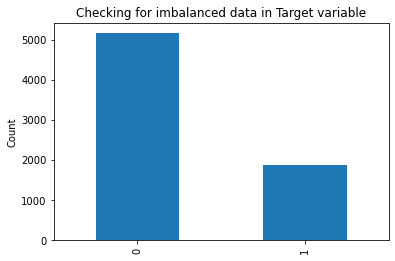

In [44]:
print("Counts of Target variable")
print(data[target_col].value_counts())
print()

data[target_col].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Checking for imbalanced data in Target variable')

data.shape

### Other possible cleaning steps:
- Encode text values as numerics
- Oversample or Undersample to reduce class imbalance

### e) Identify categorical variables in dataset

In [45]:
def identify_cat_var(cat_data,cat_threshold):
    cat_var = []
    for each in cat_data:
        if cat_data[each].nunique() <= cat_threshold:
            cat_var.append(each)
    return cat_var

In [46]:
identify_cat_var(data,cat_threshold)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [47]:
if auto_detect_cat:
    #Separate independent variables from
    if any_ID_col == None or any_ID_col == 'None':
        cat_data = data.drop([target_col], axis=1)
    else:
        cat_data = data.drop([target_col,any_ID_col], axis=1)

    cat_var = identify_cat_var(cat_data,cat_threshold)
    print(cat_var)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


### Step 5 - Visualization

### a) Correlation

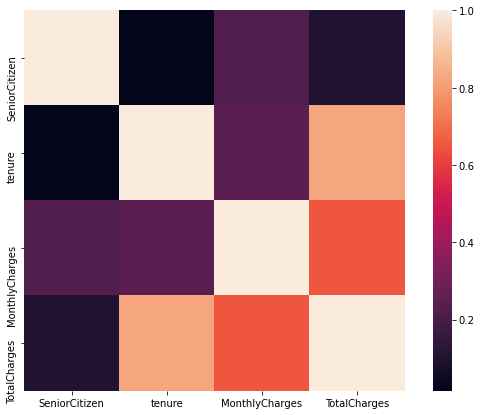

In [48]:
if generate_corr:
    #Drop outcome column
    data_cor = data.drop([target_col], axis=1)
    
    #Compute correlation between the outcome and each feature , excluding NA values.
    corrmtx = data_cor.corr(method='pearson') 
    f, ax = plt.subplots(figsize = (10,7))
    sns.heatmap(corrmtx, vmax =1.0,square = True)


### b) Univariate Analysis

In [49]:
def test_select(col_name, target_col, data, cat_var):
    p_val = 0
    
    #For categorical
    if col_name in cat_var:  
        #Contingency Table
        contingency_table = pd.crosstab(data[col_name], data[target_col])
        
        #Chi Square Test
        c, p, dof, expected = scs.chi2_contingency(contingency_table)
        p_val = p
        
    #For Continuous
    else: 
        #Mann-Whitney Test
        c, p = scs.mannwhitneyu(x=data[col_name].loc[data[target_col] == 0],y=data[col_name].loc[data[target_col] == 1])
        p_val = p
        
    return p_val

#### Function to select appropriate visualizations

- For Categorical Variables - Generate Barplot
- For Continous Variables - Generate Boxplot

In [50]:
def viz_selector(col_name, target_col, data, cat_var):

    #For categorical
    if col_name in cat_var:  
        
        #bar plot.
        contingency_table = pd.crosstab(data[col_name], data[target_col])
        bar_data = pd.DataFrame(contingency_table)
        
        my_viz = bar_data.plot(kind='bar')
        plt.ylabel('Count')
        new_col_name = col_name.replace(" ","") 
        new_col_name = new_col_name.replace("*","")
        new_col_name = new_col_name.replace("/","")
    
        plt.show()
    
    #For Continuous
    else: 
        
        #boxplot
        my_viz = data.boxplot(column=col_name,by=target_col)
        plt.ylabel(col_name)
        plt.title('')
        new_col_name = col_name.replace(" ","") 
        new_col_name = new_col_name.replace("*","") 
        new_col_name = new_col_name.replace("/","")
        
        plt.show()

Plotting top significant 10 features.
 
univariate Analysis
Contract: (p-val = 7.326182186265472e-257)
tenure: (p-val = 3.0215232904413584e-211)
InternetService: (p-val = 5.831198962237274e-159)
PaymentMethod: (p-val = 1.4263098511063342e-139)
TotalCharges: (p-val = 9.979924469422913e-85)
PaperlessBilling: (p-val = 8.236203353962564e-58)
MonthlyCharges: (p-val = 4.2335975222743747e-54)
OnlineSecurity: (p-val = 1.37424000884718e-46)
TechSupport: (p-val = 3.2328683255491206e-43)
Dependents: (p-val = 2.0196592017051303e-42)


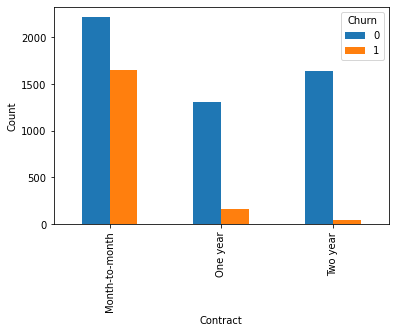

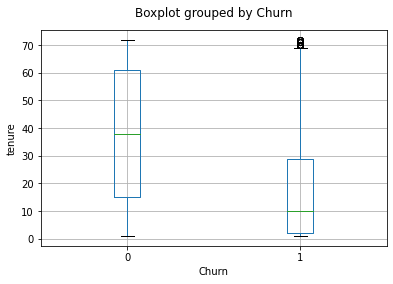

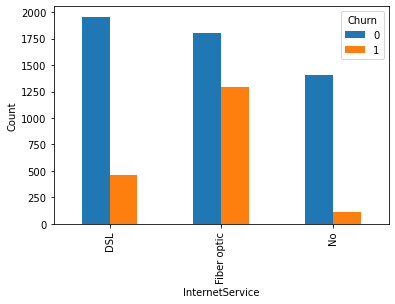

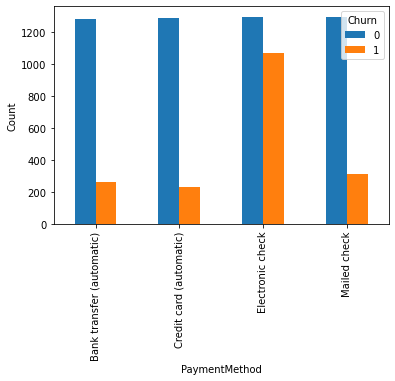

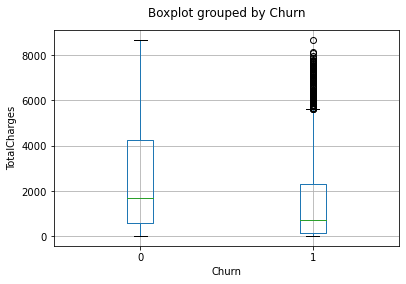

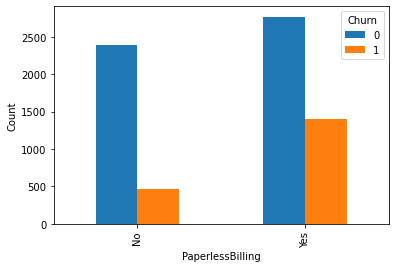

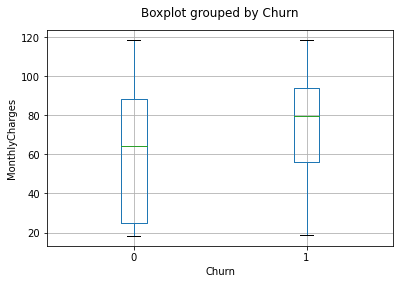

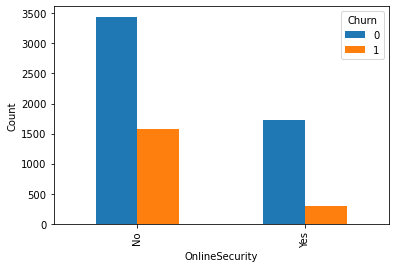

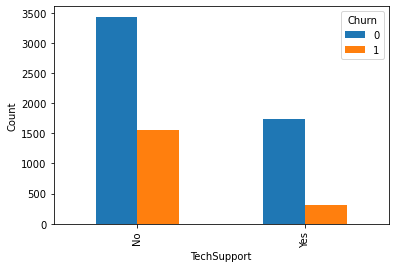

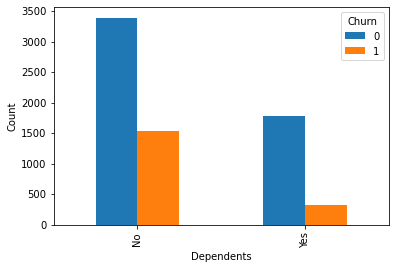

In [51]:
if uni_viz:
    p_val_dict = {}
    
    #run appropriate univariate analysis
    for each in data:
        if each != target_col and each != any_ID_col: 
            p_val_dict[each] = test_select(each, target_col, data, cat_var)
    
    num_cols = data.shape[1] - 1
    
    sort_list = sorted(p_val_dict.items(), key = lambda item:item[1]) 
    
    min_num = min(top_var,num_cols)
    sort_list = sort_list[: min_num]
    print('Plotting top significant '+ str(min_num) + ' features.')
    
    #summarize
    print(' ')
    print('univariate Analysis')
    for each in sort_list[:min_num]:
        print(each[0]+": (p-val = "+str(each[1]) +")")

    #generate appropriate plot
    for i in sort_list:
        for j in data:
            if j == i[0]:
                viz_selector(j, target_col, data, cat_var)

### Step 6 - One-Hot Encoding

In [52]:
data_encoded = pd.get_dummies(data, columns =['gender','Partner','Dependents','PhoneService','MultipleLines',
                                              'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                                             'TechSupport','StreamingTV','StreamingMovies','Contract',
                                             'PaperlessBilling','PaymentMethod'])

data_encoded.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### Step 7 - Create n-fold Cross Validation Datasets

(Training and Testing Datasets)

In [53]:
def cv_partition(data_encoded, cv_num, cv_type, target_col, classification_type, cv_match, randomSeed):
    
    #Partitioning
    #Shuffle instances to avoid potential biases
    data_encoded = data_encoded.sample(frac=1, random_state = randomSeed).reset_index(drop=True)
                
    #Temporarily convert df to list of lists
    df_header = list(data_encoded.columns.values)
    d_list = list(list(x) for x in zip(*(data_encoded[x].values.tolist() for x in data_encoded.columns)))

    #Handle Special Variables for Nominal Outcomes
    target_index = None
    class_list = None
    if classification_type:
        target_index = data_encoded.columns.get_loc(target_col)
        class_list = []
        for each in d_list:
            if each[target_index] not in class_list:
                class_list.append(each[target_index])
                
    #Initialize partitions
    partition_list = []
    for x in range(cv_num):
        partition_list.append([])
    
    #Random Partitioning Method
    if cv_type == 'R':
        print("Random Partitioning")
        curr_partition = 0
        counter = 0
        for row in d_list:
            partition_list[curr_partition].append(row)
            counter += 1
            curr_partition = counter%cv_num
    
    #Stratified Partitioning Method
    elif cv_type == 'S':
        if classification_type:
            print("Stratified Partitioning")
            
            #Create data sublists, each having all rows with the same class
            same_class_rows = [ [] for i in range(len(class_list)) ] #create list of empty lists
            for row in d_list:
                #find index in class_list corresponding to the class of the current row. 
                class_index = class_list.index(row[target_index])
                same_class_rows[class_index].append(row)

            for class_set in same_class_rows:
                curr_partition = 0
                counter = 0
                for row in class_set:
                    partition_list[curr_partition].append(row)
                    counter += 1
                    curr_partition = counter%cv_num
    
        else:
            print("Error: Stratified partitioning only designed for discrete endpoints. ")
    
    elif cv_type == 'M':
        if classification_type:
            
            #Get match variable column index
            target_index = data_encoded.columns.get_loc(target_col)
            match_index = data_encoded.columns.get_loc(cv_match)

            print("Matched Partitioning")
            
            #Create data sublists, each having all rows with the same match identifier
            match_list = []
            for each in d_list:
                if each[match_index] not in match_list:
                    match_list.append(each[match_index])

            match_row = [ [] for i in range(len(match_list)) ] #create list of empty lists
            
            for row in d_list:
                #find index in match_list corresponding to the matchset of the current row. 
                m_index = match_list.index(row[match_index])
                row.pop(match_index) #remove match column from partition output
                match_row[m_index].append(row)
                    
            curr_partition = 0
            counter = 0
            for matchSet in match_row: #Go through each unique set of matched instances
                for row in matchSet: #put all of the instances
                    partition_list[curr_partition].append(row)
                #move on to next matchset being placed in the next partition. 
                counter += 1
                curr_partition = counter%cv_num

            df_header.pop(match_index) #remove match column from partition output
        else: 
            print("Error: Matched partitioning only designed for discrete endpoints. ")
            
    else:
        print('Error: Requested partition method not found.')
        
   #Generation of CV datasets from partitions
    Training_dataframe = []
    Testing_dataframe = []
    for part in range(0, cv_num):
        Testing_list=partition_list[part] # Assign testing set as the current partition

        Training_list=[]
        Temp_list = []                 
        for x in range(0,cv_num): 
            Temp_list.append(x)                            
        Temp_list.pop(part)

        for v in Temp_list: #for each training partition
            Training_list.extend(partition_list[v])   
  
        Training_dataframe.append(pd.DataFrame(Training_list, columns = df_header))
        Testing_dataframe.append(pd.DataFrame(Testing_list, columns = df_header))
            
    return Training_dataframe, Testing_dataframe 


In [54]:
#Create a df_header list of independant feature names
df_header = data_encoded.columns.values.tolist()
df_header.remove(target_col)
if any_ID_col != None and any_ID_col != 'None':
    df_header.remove(any_ID_col)

#Perform CV partitioning (get back list of training and testing partition dataframes)
Training_dataframe, Testing_dataframe = cv_partition(data_encoded, cv_num, cv_type, target_col, classification_type, cv_match, randomSeed)

if cv_type == 'M':
    df_header.remove(cv_match)

Stratified Partitioning


### Step 8 -  Scaling 

Used - In this case we have used **MinMaxScaler()**. We can also choose **StandardScaler()** according to the data

In [55]:
def Scale_Data(Training_dataframe, Testing_dataframe, target_col, any_ID_col, df_header):
    scaled_Training_dataframe = []
    scaled_Testing_dataframe = []
    
    #Scale all training datasets
    i = 0
    for each in Training_dataframe:
        df = each
        if any_ID_col == None or any_ID_col == 'None':
            x_train = df.drop([target_col], axis=1)
        else:
            x_train = df.drop([target_col,any_ID_col], axis=1)
            inst_train = df[any_ID_col] #pull out any_ID_col in case they include text
        y_train = df[target_col]

        #Scale features (x)
        scaler = MinMaxScaler()
        scaler.fit(x_train) 
        x_train_scaled = pd.DataFrame(scaler.transform(x_train),columns = x_train.columns)
    
        #Recombine x and y
        if any_ID_col == None or any_ID_col == 'None':
            scaled_Training_dataframe.append(pd.concat([pd.DataFrame(y_train, columns = [target_col]), pd.DataFrame(x_train_scaled, columns = df_header)], axis=1, sort=False))
        else:
            scaled_Training_dataframe.append(pd.concat([pd.DataFrame(y_train, columns = [target_col]), pd.DataFrame(inst_train, columns = [instLabel]), pd.DataFrame(x_train_scaled, columns = df_header)], axis=1, sort=False))

        #Scale corresponding testing dataset
        df = Testing_dataframe[i]
        if any_ID_col == None or any_ID_col == 'None':
            x_test = df.drop([target_col], axis=1)
        else:
            x_test = df.drop([target_col,any_ID_col], axis=1)
            inst_test = df[any_ID_col] #pull out instance labels in case they include text
        y_test = df[target_col]

        #Scale features (x)
        x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)
    
        #Recombine x and y
        if any_ID_col == None or any_ID_col == 'None':
            scaled_Testing_dataframe.append(pd.concat([pd.DataFrame(y_test, columns = [target_col]), pd.DataFrame(x_test_scaled, columns = df_header)], axis=1, sort=False))
        else:
            scaled_Testing_dataframe.append(pd.concat([pd.DataFrame(y_test, columns = [target_col]), pd.DataFrame(inst_test, columns = [instLabel]), pd.DataFrame(x_test_scaled, columns = df_header)], axis=1, sort=False))
            
        i += 1

    return scaled_Training_dataframe, scaled_Testing_dataframe


In [56]:
if req_scaling:
    print('Data is scaled')
    Training_dataframe, Testing_dataframe = Scale_Data(Training_dataframe, Testing_dataframe, target_col, any_ID_col, df_header)

Data is scaled


### Step 9 -  a) Save Training and Testing set as csv file

In [57]:
counter = 0
for each in Training_dataframe:
    each.to_csv('Training.csv', index=None)
    counter += 1
    
counter = 0
for each in Testing_dataframe:
    each.to_csv('Testing.csv', index=None)
    counter += 1

### Step 9 - b)   Re-load training and testing datasets from saved csv files

In [58]:
#create lists to hold training and testing set dataframes.
Training_list = []
Testing_list = []

for i in range(cv_num):
    #Load training partition
    Training_set = pd.read_csv('C:/Users/Nikhila KG/Training.csv')
    Training_list.append(Training_set)
    
    #Load testing partition
    Testing_set = pd.read_csv('C:/Users/Nikhila KG/Testing.csv')
    Testing_list.append(Testing_set)
    
print('Number of Training Partitions: '+ str(len(Training_list)))
print('Number of Testing Partitions: '+ str(len(Testing_list)))

Number of Training Partitions: 3
Number of Testing Partitions: 3


### c) Merge the training and testing datasets to confirm with original dataset

In [59]:
#Confirm counts when merging one training and testing dataset
Train_class = Training_list[0].apply(lambda x: True if x[target_col] == 1 else False , axis=1)
Train_churned = len(Train_class[Train_class == True].index)
Train_not_churned = len(Train_class[Train_class == False].index)

Test_class = Testing_list[0].apply(lambda x: True if x[target_col] == 1 else False , axis=1)
Test_churned = len(Test_class[Test_class == True].index)
Test_not_churned = len(Test_class[Test_class == False].index)

print("Number of churned in Original Dataset: "+str(Train_churned+Test_churned))
print("Number of not_churned in Original Dataset: "+str(Train_not_churned+Test_not_churned))

Number of churned in Original Dataset: 1869
Number of not_churned in Original Dataset: 5163


### d) Confirm training and testing set dimensions

In [60]:
print("Training Set Dimensions: " + str(Training_list[0].shape))
print("Testing Set Dimensions: " + str(Testing_list[0].shape))
numColumns = Training_list[0].shape[1]

Training Set Dimensions: (4688, 39)
Testing Set Dimensions: (2344, 39)


In [61]:
Training_col_names = list(Training_list[0])
Testing_col_names = list(Testing_list[0])

if not Training_col_names == Testing_col_names:
    print('Error: Training columns do not match testing columns!')

### e) Drop Instance ID from all training and test sets

In [62]:
if any_ID_col != None and any_ID_col != 'None':
    for i in range(cv_num):
        Training_list[i] = Training_list[i].drop([any_ID_col] , axis = 1)
        Testing_list[i] = Testing_list[i].drop([any_ID_col] , axis = 1)

In [63]:
global_ordered_features = [] #Holds the new order of features in the CV datasets
for i in range(cv_num):
    cv_ordered_features = list(Training_list[i])
    cv_ordered_features.remove(target_col)
    
    global_ordered_features.append(cv_ordered_features)

In [64]:
Training_col_names = list(Training_list[0])
Testing_col_names = list(Testing_list[0])

if not Training_col_names == Testing_col_names:
    print('Error: Training columns do not match testing columns!')

#Create master list of feature names (excluding outcome column)
ordered_feature_names = copy.deepcopy(Training_col_names) #Stores original ordered feature list 
ordered_feature_names.remove(target_col)

### f) Separate data into training and test features and outcomes

In [65]:
xTraining_list = []
yTraining_list = []
xTesting_list = []
yTesting_list = []

for i in range(cv_num):
    xTraining_list.append(Training_list[i].iloc[:, 1:].values)
    yTraining_list.append(Training_list[i].iloc[:, 0].values)
 
    xTesting_list.append(Testing_list[i].iloc[:, 1:].values)
    yTesting_list.append(Testing_list[i].iloc[:, 0].values)

### Step 10 - Machine Learning Models

### Pre- Requisites for Machine learning Models
(Create separate functions for various purposes.)

### a) Information about Hyper - Parameters

In [66]:
#Logistic Regression
param_grid_LR = {'penalty' : ['l2','l1'],
                'C' : [1e-5, 1e5], 
                'dual' : [True, False],
                'solver' : ['newton-cg','lbfgs', 'liblinear', 'sag','saga'],
                'class_weight' : [None, 'balanced'],
                'max_iter' : [10, 1000],
                'n_jobs' : [-1]}

#Decision Tree
param_grid_DT = {'criterion' : ['gini', 'entropy'],
                'splitter' : ['best', 'random'],
                'max_depth' : [1, 30],
                'min_samples_split' : [2, 50], 
                'min_samples_leaf' : [1, 50],
                'max_features' : [None, 'auto','log2'],
                'class_weight' : [None, 'balanced']}

#Random Forest
param_grid_RF = {'n_estimators': [10,1000],
                'criterion' : ['gini', 'entropy'],
                'max_depth' : [1, 30],
                'min_samples_split' : [2, 50], 
                'min_samples_leaf' : [1, 50],
                'max_features' : [None, 'auto','log2'],
                'bootstrap' : [True],
                'oob_score' : [False, True],
                'n_jobs' : [-1],
                'class_weight' : [None, 'balanced']}

#Naive_bayes - no hyperparameters

#XG Boost - note: class weight balance is included as option internally
param_grid_XGB = {'booster': ['gbtree'],
                'objective' : ['binary:logistic'],
                'verbosity' : [0],
                'reg_lambda' : [1e-8, 1.0],
                'alpha' : [1e-8, 1.0],
                'eta' : [1e-8, 1.0],
                'gamma' : [1e-8, 1.0],
                'max_depth' : [1, 30],
                'grow_policy' : ['depthwise', 'lossguide'],
                'n_estimators': [10,1000],
                'min_samples_split' : [2, 50], 
                'min_samples_leaf' : [1, 50],
                'subsample' : [0.5, 1.0],
                'min_child_weight': [0.1, 10],
                'colsample_bytree': [0.1, 1.0]}

#SVM
param_grid_SVM = {'kernel' : ['linear','poly','rbf'],
                'C': [0.1, 1000],
                'gamma': ['scale'],
                'degree': [1,6],
                'probability' : [True],
                'class_weight' : [None, 'balanced']}


#Gradient_boosting
param_grid_GB = {'loss':['deviance', 'exponential'],'learning_rate': [1e-2, 1],'min_samples_leaf':[1,200],
                'max_depth':[1,10],'max_leaf_nodes':[None],'tol':[1e-7],'n_iter_no_change':[1,20],
                'validation_fraction':[0.01, 0.31, 0.01]}

#K_neighbors
param_grid_KN = {'n_neighbors':[1,100],'weights':['uniform', 'distance'],'p':[1,5],'metric':['euclidean', 'minkowski']}

#stores all user selected algorithm hyperparameters
param_grid = {} 

### b) To Run Algorithms

In [67]:
                                                       
for algorithm in considered_alg:
    if algorithm == 'Logistic_Regression':
        param_grid['Logistic_Regression'] = param_grid_LR
    elif algorithm == 'Decision_Tree':
        param_grid['Decision_Tree'] = param_grid_DT
    elif algorithm == 'Random_Forest':
        param_grid['Random_Forest'] = param_grid_RF
    elif algorithm == 'Naive_Bayes':
        pass #no hyperparameters
    elif algorithm == 'XGB':
        param_grid['XGB'] = param_grid_XGB
    elif algorithm == 'SVM':
        param_grid['SVM'] = param_grid_SVM
    elif algorithm == 'Gradient_Boosting':
        param_grid['Gradient_Boosting'] = param_grid_GB
    elif algorithm == 'K_Neighbors':
        param_grid['K_Neighbors'] = param_grid_KN
        
    else:
        print("Error: Algorithm not found!") 

### c) Pre- defined common functions for all Machine Learning models

#### 1. To Evaluate the results by comparing the actual value vs Predicted Value

- TN = True Negative count
- TP = True Positive count
- FN = False Negative count
- FP = False Positive count


- AC = Accuracy score
- BAC - Balanced Accuracy Score
- RE = Recall score
- PR = Precision score
- F1 = F1 score


- SP = Specificity

In [68]:
def Evaluate_results(y_actual, y_predict, verbose = False):
	#calculate and store evaluation metrics
	tn, fp, fn, tp = confusion_matrix(y_actual, y_predict).ravel()

	ac = accuracy_score(y_actual, y_predict)
	bac = balanced_accuracy_score(y_actual, y_predict)
	re = recall_score(y_actual, y_predict)
	pr = precision_score(y_actual, y_predict)
	f1 = f1_score(y_actual, y_predict)

	#calculate specificity
	if tn == 0 and fp == 0:
		sp = 0
	else:
		sp = tn/float(tn+fp)

	if verbose:
		print("Balanced Accuracy:    "+str(bac))
		print("Accuracy (Standard):  "+str(ac))
		print("F1 Score:             "+str(f1))
		print("Sensitivity (Recall): "+str(re))
		print("Specificity:          "+str(sp))
		print("Precision :           "+str(pr))
		print("TP:                   "+str(tp))
		print("TN:                   "+str(tn))
		print("FP:                   "+str(fp))
		print("FN:                   "+str(fn))

	return [bac, ac, f1, re, sp, pr, tp, tn, fp, fn]

#### 2. Generate ROC curve

In [69]:
def ROC_CURVE(fpr, tpr, roc_auc):
	#Plot the ROC Curve and include AUC in figure.
	plt.figure()
	lw = 2
	plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
	plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.05])
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title('Receiver operating characteristic')
	plt.legend(loc="lower right")
	plt.show()

#### 3. Return the list of Feature Importance and Precision-Recall Curve (PRC)

In [70]:
def Evaluate_FI(algorithm,ordered_feature_names,
                      xTraining_list,yTraining_list,xTesting_list,yTesting_list,
                      cv_num,global_ordered_features,randSeed,param_grid,algColor,
                      hype_cv,n_trials,best_hyperparameter,timeout):
    
	alg_result_table = []
    
	#Define evaluation variable lists
	s_bac = []
	s_ac = []
	s_f1 = []
	s_re = []
	s_sp = []
	s_pr = []
	s_tp = []
	s_tn = []
	s_fp = []
	s_fn = []

	#Define feature importance lists
	FI_all = []
	FI_ave = [0]*len(ordered_feature_names) #Holds only the selected feature FI results for each partition

	#Define ROC plot variable lists
	tprs = []
	aucs = []
	mean_fpr = np.linspace(0, 1, 100)
	mean_recall = np.linspace(0, 1, 100)
    
	#Define precision-recall curve plot variable lists
	precs = []
	praucs = []
	aveprecs = []

	#Pickle model name basis
	for i in tqdm_notebook(range(cv_num), desc='1st loop'):
		#Algorithm Specific Code
		print("Running "+str(algorithm))
		if algorithm == 'Logistic_Regression':
			metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi = run_LR_full(xTraining_list[i], yTraining_list[i], xTesting_list[i], yTesting_list[i],randSeed,i,param_grid[algorithm],hype_cv,n_trials,best_hyperparameter,timeout,algorithm)
		elif algorithm == 'Decision_Tree':
			metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi = run_DT_full(xTraining_list[i], yTraining_list[i], xTesting_list[i], yTesting_list[i],randSeed,i,param_grid[algorithm],hype_cv,n_trials,best_hyperparameter,timeout,algorithm)
		elif algorithm == 'Random_Forest':
			metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi = run_RF_full(xTraining_list[i], yTraining_list[i], xTesting_list[i], yTesting_list[i],randSeed,i,param_grid[algorithm],hype_cv,n_trials,best_hyperparameter,timeout,algorithm)
		elif algorithm == 'Naive_Bayes':
			metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi = run_NB_full(xTraining_list[i], yTraining_list[i], xTesting_list[i], yTesting_list[i],i)
		elif algorithm == 'XGB':
			metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi = run_XGB_full(xTraining_list[i], yTraining_list[i], xTesting_list[i], yTesting_list[i],randSeed,i,param_grid[algorithm],hype_cv,n_trials,best_hyperparameter,timeout,algorithm)
		elif algorithm == 'SVM':
			metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi = run_SVM_full(xTraining_list[i], yTraining_list[i], xTesting_list[i], yTesting_list[i],randSeed,i,param_grid[algorithm],hype_cv,n_trials,best_hyperparameter,timeout,algorithm)
		elif algorithm == 'Gradient_Boosting':
			metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi = run_GB_full(xTraining_list[i],yTraining_list[i],xTesting_list[i],yTesting_list[i],randSeed, i,param_grid[algorithm],hype_cv,n_trials,best_hyperparameter,timeout,algorithm)
		elif algorithm == 'K_Neighbors':
			metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi = run_KN_full(xTraining_list[i],yTraining_list[i],xTesting_list[i],yTesting_list[i],randSeed, i,param_grid[algorithm],hype_cv,n_trials,best_hyperparameter,timeout,algorithm)
		else:
			print("Error: Algorithm not found!")

		#Update evaluation variable lists
		s_bac.append(metricList[0])
		s_ac.append(metricList[1])
		s_f1.append(metricList[2])
		s_re.append(metricList[3])
		s_sp.append(metricList[4])
		s_pr.append(metricList[5])
		s_tp.append(metricList[6])
		s_tn.append(metricList[7])
		s_fp.append(metricList[8])
		s_fn.append(metricList[9])

		alg_result_table.append([fpr,tpr,roc_auc,recall,prec,prec_rec_auc,ave_prec])

		#Update ROC plot variable lists
		tprs.append(interp(mean_fpr, fpr, tpr))
		tprs[-1][0] = 0.0
		aucs.append(roc_auc)

		#Update precision-recall curve plot variable lists
		precs.append(interp(mean_recall, recall, prec))
		praucs.append(prec_rec_auc)
		aveprecs.append(ave_prec)
        
		#Format feature importance scores as list (takes into account that all features are not in each CV partition)
		Temp_list = []
		j = 0
		for each in ordered_feature_names:
			if each in global_ordered_features[i]: #Check if current feature from original dataset was in the partition
				#Deal with features not being in original order (find index of current feature list.index()
				f_index = global_ordered_features[i].index(each)
				FI_ave[j] += fi[f_index]
				Temp_list.append(fi[f_index])
			else:
				Temp_list.append(0)
			j += 1
			
		FI_all.append(Temp_list)

	#ROC plot (individual algorithm) -----------------------------------------------------------------------------------------------------
	plt.figure(figsize=(7,7))
	for i in range(cv_num):
		#Plot individual CV ROC line
		plt.plot(alg_result_table[i][0], alg_result_table[i][1], lw=1, alpha=0.3,
				 label='ROC fold %d (AUC = %0.2f)' % (i, alg_result_table[i][2]))
		
	#Add chance line to ROC plot
	plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
			 label='Chance', alpha=.8)

	#Calculate and draw average CV ROC line     list.index(element)
	mean_tpr = np.mean(tprs, axis=0)
	mean_tpr[-1] = 1.0
	mean_auc = auc(mean_fpr, mean_tpr)
	std_auc = np.std(aucs)
	plt.plot(mean_fpr, mean_tpr, color=algColor,
			 label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
			 lw=2, alpha=.8)

	std_tpr = np.std(tprs, axis=0)
	tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
	tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
	plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
					 label=r'$\pm$ 1 std. dev.')

	plt.xlim([-0.05, 1.05])
	plt.ylim([-0.05, 1.05])
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title(algorithm+' : ROC over CV Partitions')
	plt.legend(loc="best")
	plt.show()

	plt.figure(figsize=(7,7))
	for i in range(cv_num):
		#Plot individual CV ROC line
		plt.plot(alg_result_table[i][3], alg_result_table[i][4], lw=1, alpha=0.3,
				 label='precision-recall curve fold %d (AUC = %0.2f) (APS = %0.2f)' % (i, alg_result_table[i][5],alg_result_table[i][6]))
		
	#Add chance line to precision-recall curve plot
	noskill = len(yTesting_list[0][yTesting_list[0]==1]) / len(yTesting_list[0]) #Fraction of cases
	plt.plot([0, 1], [noskill, noskill], linestyle='--', lw=2, color='r',
			 label='Chance', alpha=.8)

	#Calculate and draw average CV precision-recall curve line
	mean_prec = np.mean(precs, axis=0)
	mean_pr_auc = auc(mean_recall, mean_prec)
	std_auc = np.std(praucs)
	plt.plot(mean_recall, mean_prec, color=algColor,
			 label=r'Mean precision-recall curve (AUC = %0.2f $\pm$ %0.2f)' % (mean_pr_auc, std_auc),
			 lw=2, alpha=.8)

	std_prec = np.std(precs, axis=0)
	precs_upper = np.minimum(mean_prec + std_prec, 1)
	precs_lower = np.maximum(mean_prec - std_prec, 0)
	plt.fill_between(mean_fpr, precs_lower, precs_upper, color='grey', alpha=.2,
					 label=r'$\pm$ 1 std. dev.')

	plt.xlim([-0.05, 1.05])
	plt.ylim([-0.05, 1.05])
	plt.xlabel('Recall')
	plt.ylabel('Precision')
	plt.title(algorithm+' : precision-recall curve over CV Partitions')
	plt.legend(loc="best")
	plt.show()

	#Calculate and report average eval statistics.
	print("Avg. Model Balanced Accuracy = " + str(np.mean(s_bac)) +
		 " (std. dev. = " + str(np.std(s_bac)) + ")")    
	print("Avg. Model Accuracy = " + str(np.mean(s_ac)) +
		  " (std. dev. = " + str(np.std(s_ac)) + ")")
	print("Avg. Model F1-Score = " + str(np.mean(s_f1)) +
		  " (std. dev. = " + str(np.std(s_f1)) + ")")
	print("Avg. Model Recall = " + str(np.mean(s_re)) +
		 " (std. dev. = " + str(np.std(s_re)) + ")")
	print("Avg. Model Specificity = " + str(np.mean(s_sp)) +
		 " (std. dev. = " + str(np.std(s_sp)) + ")")
	print("Avg. Model Precision = " + str(np.mean(s_pr)) +
		  " (std. dev. = " + str(np.std(s_pr)) + ")")
	print("Avg. Model True Positives = " + str(np.mean(s_tp)) +
		  " (std. dev. = " + str(np.std(s_tp)) + ")")
	print("Avg. Model True Negatives = " + str(np.mean(s_tn)) +
		  " (std. dev. = " + str(np.std(s_tn)) + ")")
	print("Avg. Model False Positives = " + str(np.mean(s_fp)) +
		  " (std. dev. = " + str(np.std(s_fp)) + ")")
	print("Avg. Model False Negatives = " + str(np.mean(s_fn)) +
		  " (std. dev. = " + str(np.std(s_fn)) + ")")
	print("Avg. ROC AUC = " + str(np.mean(aucs)) +
		  " (std. dev. = " + str(np.std(aucs)) + ")")
	print("Avg. precision-recall curve AUC = " + str(np.mean(praucs)) +
		  " (std. dev. = " + str(np.std(praucs)) + ")")
	print("Avg. precision-recall curve Precision Score = " + str(np.mean(aveprecs)) +
		  " (std. dev. = " + str(np.std(aveprecs)) + ")")

	#Calculate average feature importance scores
	for i in range(0,len(FI_ave)):
		FI_ave[i] = FI_ave[i]/float(cv_num)

	mean_ave_prec = np.mean(aveprecs)
	return mean_fpr, mean_tpr, mean_auc, mean_prec, mean_pr_auc, mean_ave_prec, FI_ave

#### 4. ComputeImportances

In [71]:
def computeImportances(clf, x_train, y_train, x_test, y_test, bac):
	#Reruns the model n times (once for each feature), and evaluates performance change as a standard of feature importance
	feature_count = len(x_train[0])
	#print(feature_count)
	FIbAccList = []
	for feature in tqdm_notebook(range(feature_count), desc='1st loop'):
		indexList = []
		indexList.extend(range(0, feature))
		indexList.extend(range(feature + 1, feature_count))

		#Create temporary training and testing sets
		tempTrain = pd.DataFrame(x_train)
		FIxTraining_list = tempTrain.iloc[:, indexList].values

		tempTest = pd.DataFrame(x_test)
		FIxTesting_list = tempTest.iloc[:, indexList].values

		clf.fit(FIxTraining_list, y_train)
		FIyPred = clf.predict(FIxTesting_list)

		FIbAccList.append(balanced_accuracy_score(y_test, FIyPred))

	#Lower balanced accuracy metric values suggest higher feature importance
	featureImpList = []
	for element in FIbAccList:
		if element > bac: #removal of feature yielded higher accuracy
			featureImpList.append(0) #worst importance
		else:
			featureImpList.append(bac - element)

	return featureImpList

#### 5. Intersection

In [72]:
def intersection(lst1, lst2):
	lst3 = [value for value in lst1 if value in lst2]
	return lst3

#### 6. Evaluate the hyper parameters

In [73]:
def hyper_eval(est, x_train, y_train, randSeed, hype_cv, params, best_hyperparameter):
	cv = StratifiedKFold(n_splits=hype_cv, shuffle=True, random_state=randSeed)
	model = clone(est).set_params(**params)
	#Flexibly handle whether random seed is given as 'random_seed' or 'seed' - scikit learn uses 'random_seed'
	for a in ['random_state','seed']:
		if hasattr(model,a):
			setattr(model,a,randSeed)
	performance = np.mean(cross_val_score(model,x_train,y_train,cv=cv,scoring=best_hyperparameter )) 
	return performance

### Logistic Regression

In [74]:
def objective_LR(trial, est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter):
	params = {'penalty' : trial.suggest_categorical('penalty',param_grid['penalty']),
			  'dual' : trial.suggest_categorical('dual', param_grid['dual']),
			  'C' : trial.suggest_loguniform('C', param_grid['C'][0], param_grid['C'][1]),
			  'solver' : trial.suggest_categorical('solver',param_grid['solver']),
			  'class_weight' : trial.suggest_categorical('class_weight',param_grid['class_weight']),
			  'max_iter' : trial.suggest_loguniform('max_iter',param_grid['max_iter'][0], param_grid['max_iter'][1]),
			  'n_jobs' : trial.suggest_categorical('n_jobs',param_grid['n_jobs'])}
	return hyper_eval(est, x_train, y_train, randSeed, hype_cv, params, best_hyperparameter)


In [75]:
def run_LR_full(x_train, y_train, x_test, y_test, randSeed, 
                i, param_grid, hype_cv, n_trials, best_hyperparameter,timeout,algorithm):
	#Run Hyperparameter sweep
	est = LogisticRegression()
	sampler = optuna.samplers.TPESampler(seed=randSeed) 
	study = optuna.create_study(direction='maximize', sampler=sampler)
	optuna.logging.set_verbosity(optuna.logging.CRITICAL)
	study.optimize(lambda trial: objective_LR(trial,est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter), n_trials=n_trials, timeout=timeout, catch=(ValueError,))

	fig = optuna.visualization.plot_parallel_coordinate(study)

	print('Best trial:')
	best_trial = study.best_trial
	print('  Value: ', best_trial.value)
	print('  Params: ')
	for key, value in best_trial.params.items():
		print('    {}: {}'.format(key, value))
	
	#Train model using 'best' hyperparameters
	est = LogisticRegression()
	clf = clone(est).set_params(**best_trial.params)  
	setattr(clf,'random_state',randSeed)

	model = clf.fit(x_train, y_train)

	#Prediction evaluation
	y_predict = clf.predict(x_test)

	metricList = Evaluate_results(y_test, y_predict, False)

	#Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
	probas_ = model.predict_proba(x_test)

	# Compute ROC curve and AUC
	fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
	roc_auc = auc(fpr, tpr)

	# Compute Precision/Recall curve and AUC
	prec, recall, thresholds = metrics.precision_recall_curve(y_test, probas_[:, 1])
	prec, recall, thresholds = prec[::-1], recall[::-1], thresholds[::-1]
	prec_rec_auc = auc(recall, prec)
	ave_prec = metrics.average_precision_score(y_test, probas_[:, 1])

	#Feature Importance Estimates
	#fi = np.exp(clf.coef_[0]) Estimate from coeficients (potentially unreliable even with data scaling)
	fi = computeImportances(clf, x_train, y_train, x_test, y_test, metricList[0])

	return metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

[I 2022-03-06 11:28:23,072] A new study created in memory with name: no-name-7a540477-b4eb-4868-aa16-7fe7d4b33bd0


Running Logistic_Regression
Best trial:
  Value:  0.7634311210499322
  Params: 
    penalty: l1
    dual: False
    C: 33.083587332714515
    solver: saga
    class_weight: balanced
    max_iter: 206.64542018650076
    n_jobs: -1


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running Logistic_Regression
Best trial:
  Value:  0.7634311210499322
  Params: 
    penalty: l1
    dual: False
    C: 33.083587332714515
    solver: saga
    class_weight: balanced
    max_iter: 206.64542018650076
    n_jobs: -1


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running Logistic_Regression
Best trial:
  Value:  0.7634311210499322
  Params: 
    penalty: l1
    dual: False
    C: 33.083587332714515
    solver: saga
    class_weight: balanced
    max_iter: 206.64542018650076
    n_jobs: -1


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

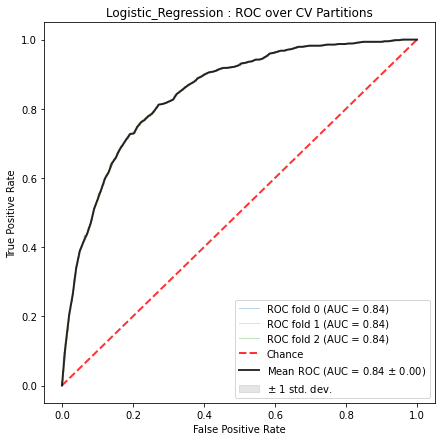

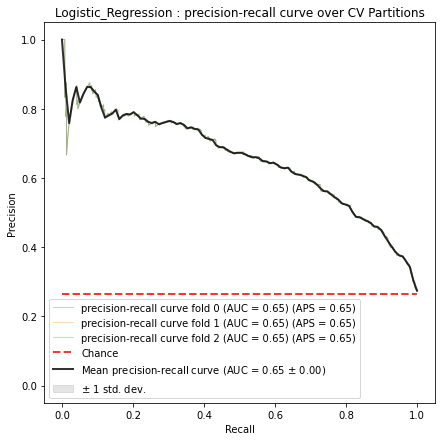

Avg. Model Balanced Accuracy = 0.7662684448457027 (std. dev. = 0.0)
Avg. Model Accuracy = 0.7627986348122867 (std. dev. = 0.0)
Avg. Model F1-Score = 0.6342105263157894 (std. dev. = 0.0)
Avg. Model Recall = 0.7736757624398075 (std. dev. = 1.1102230246251565e-16)
Avg. Model Specificity = 0.7588611272515978 (std. dev. = 1.1102230246251565e-16)
Avg. Model Precision = 0.5373467112597548 (std. dev. = 0.0)
Avg. Model True Positives = 482.0 (std. dev. = 0.0)
Avg. Model True Negatives = 1306.0 (std. dev. = 0.0)
Avg. Model False Positives = 415.0 (std. dev. = 0.0)
Avg. Model False Negatives = 141.0 (std. dev. = 0.0)
Avg. ROC AUC = 0.8442397426558713 (std. dev. = 0.0)
Avg. precision-recall curve AUC = 0.6523543189537981 (std. dev. = 0.0)
Avg. precision-recall curve Precision Score = 0.6530178715743687 (std. dev. = 0.0)


In [76]:
algorithm = 'Logistic_Regression'
if algorithm in considered_alg:
    start_time = time.time()
    algColor = algColors[considered_alg.index(algorithm)]
    mean_fpr, mean_tpr, mean_auc, mean_prec, mean_pr_auc, mean_ave_prec, FI_ave = Evaluate_FI(algorithm,ordered_feature_names,
        xTraining_list,yTraining_list,xTesting_list,yTesting_list,cv_num,global_ordered_features,randomSeed,param_grid,algColor,hype_cv,n_trials,best_hyperparameter,timeout)
    
    result_dict = {'algorithm':algorithm,'fpr':mean_fpr, 'tpr':mean_tpr, 'auc':mean_auc, 'prec':mean_prec, 'pr_auc':mean_pr_auc, 'ave_prec':mean_ave_prec}

    #Sort averages (decreasing order and print top 'n' and plot top 'n'
    names_scores = {'Names':ordered_feature_names, 'Scores':FI_ave} 
    ns = pd.DataFrame(names_scores)
    ns = ns.sort_values(by='Scores',ascending = False)

#### pickle dump

In [77]:
pickle.dump(result_dict, open('Logistic_Regression_pkl', 'wb'))

### Decision Tree

In [78]:
def objective_DT(trial, est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter):
	params = {'criterion' : trial.suggest_categorical('criterion',param_grid['criterion']),
			  'splitter' : trial.suggest_categorical('splitter', param_grid['splitter']),
			  'max_depth' : trial.suggest_int('max_depth', param_grid['max_depth'][0], param_grid['max_depth'][1]),
			  'min_samples_split' : trial.suggest_int('min_samples_split', param_grid['min_samples_split'][0], param_grid['min_samples_split'][1]),
			  'min_samples_leaf' : trial.suggest_int('min_samples_leaf', param_grid['min_samples_leaf'][0], param_grid['min_samples_leaf'][1]),
			  'max_features' : trial.suggest_categorical('max_features',param_grid['max_features']),
			  'class_weight' : trial.suggest_categorical('class_weight',param_grid['class_weight'])}
	return hyper_eval(est, x_train, y_train, randSeed, hype_cv, params, best_hyperparameter)
	
	


In [79]:
def run_DT_full(x_train, y_train, x_test, y_test,randSeed,i,param_grid, hype_cv, n_trials, best_hyperparameter,timeout,algorithm):
	#Run Hyperparameter sweep
	est =tree.DecisionTreeClassifier()
	sampler = optuna.samplers.TPESampler(seed=randSeed)  # Make the sampler behave in a deterministic way.
	study = optuna.create_study(direction='maximize', sampler=sampler)
	optuna.logging.set_verbosity(optuna.logging.CRITICAL)
	study.optimize(lambda trial: objective_DT(trial,est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter), n_trials=n_trials, timeout=timeout, catch=(ValueError,))

	fig = optuna.visualization.plot_parallel_coordinate(study)

	print('Best trial:')
	best_trial = study.best_trial
	print('  Value: ', best_trial.value)
	print('  Params: ')
	for key, value in best_trial.params.items():
		print('    {}: {}'.format(key, value))
	
	#Train model using 'best' hyperparameters
	est = tree.DecisionTreeClassifier()
	clf = clone(est).set_params(**best_trial.params)  
	setattr(clf,'random_state',randSeed)

	model = clf.fit(x_train, y_train)

	#Prediction evaluation
	y_predict = clf.predict(x_test)

	metricList = Evaluate_results(y_test, y_predict, False)

	#Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
	probas_ = model.predict_proba(x_test)

	# Compute ROC curve and area the curve
	fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
	roc_auc = auc(fpr, tpr)

	# Compute Precision/Recall curve and AUC
	prec, recall, thresholds = metrics.precision_recall_curve(y_test, probas_[:, 1])
	prec, recall, thresholds = prec[::-1], recall[::-1], thresholds[::-1]
	prec_rec_auc = auc(recall, prec)
	ave_prec = metrics.average_precision_score(y_test, probas_[:, 1])

	#Feature Importance Estimates
	fi = clf.feature_importances_

	return metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

Running Decision_Tree
Best trial:
  Value:  0.7557025813952518
  Params: 
    criterion: gini
    splitter: random
    max_depth: 7
    min_samples_split: 45
    min_samples_leaf: 32
    max_features: None
    class_weight: balanced
Running Decision_Tree
Best trial:
  Value:  0.7557025813952518
  Params: 
    criterion: gini
    splitter: random
    max_depth: 7
    min_samples_split: 45
    min_samples_leaf: 32
    max_features: None
    class_weight: balanced
Running Decision_Tree
Best trial:
  Value:  0.7557025813952518
  Params: 
    criterion: gini
    splitter: random
    max_depth: 7
    min_samples_split: 45
    min_samples_leaf: 32
    max_features: None
    class_weight: balanced


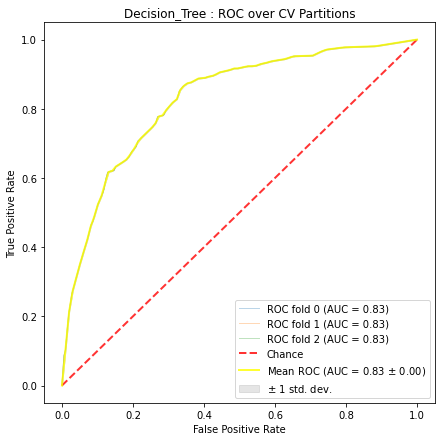

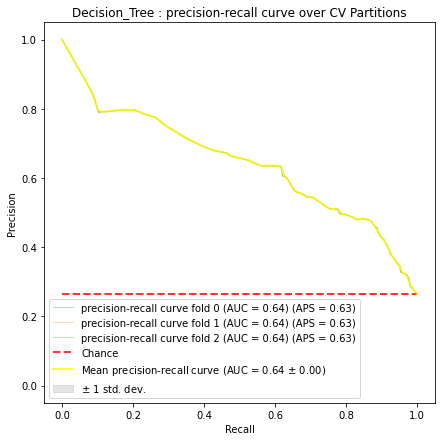

Avg. Model Balanced Accuracy = 0.7476200424740925 (std. dev. = 0.0)
Avg. Model Accuracy = 0.731655290102389 (std. dev. = 0.0)
Avg. Model F1-Score = 0.6076107298814722 (std. dev. = 0.0)
Avg. Model Recall = 0.7817014446227929 (std. dev. = 0.0)
Avg. Model Specificity = 0.7135386403253922 (std. dev. = 0.0)
Avg. Model Precision = 0.4969387755102041 (std. dev. = 0.0)
Avg. Model True Positives = 487.0 (std. dev. = 0.0)
Avg. Model True Negatives = 1228.0 (std. dev. = 0.0)
Avg. Model False Positives = 493.0 (std. dev. = 0.0)
Avg. Model False Negatives = 136.0 (std. dev. = 0.0)
Avg. ROC AUC = 0.827002946325394 (std. dev. = 1.1102230246251565e-16)
Avg. precision-recall curve AUC = 0.6431759498399288 (std. dev. = 0.0)
Avg. precision-recall curve Precision Score = 0.6311556281791542 (std. dev. = 0.0)


In [80]:
algorithm = 'Decision_Tree'
if algorithm in considered_alg:
    start_time = time.time()
    algColor = algColors[considered_alg.index(algorithm)]
    mean_fpr, mean_tpr, mean_auc, mean_prec, mean_pr_auc, mean_ave_prec, FI_ave = Evaluate_FI(algorithm,ordered_feature_names,
        xTraining_list,yTraining_list,xTesting_list,yTesting_list,cv_num,global_ordered_features,randomSeed,param_grid,algColor,hype_cv,n_trials,best_hyperparameter,timeout)
    
    result_dict = {'algorithm':algorithm,'fpr':mean_fpr, 'tpr':mean_tpr, 'auc':mean_auc, 'prec':mean_prec, 'pr_auc':mean_pr_auc, 'ave_prec':mean_ave_prec}
    
    #Sort averages (decreasing order and print top 'n' and plot top 'n'
    names_scores = {'Names':ordered_feature_names, 'Scores':FI_ave} 
    ns = pd.DataFrame(names_scores)
    ns = ns.sort_values(by='Scores',ascending = False)

#### pickle dump

In [81]:
pickle.dump(result_dict, open('Decision_Tree_pkl', 'wb'))

### Random Forest

In [82]:
def objective_RF(trial, est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter):
	params = {'n_estimators' : trial.suggest_int('n_estimators',param_grid['n_estimators'][0], param_grid['n_estimators'][1]),
			  'criterion' : trial.suggest_categorical('criterion',param_grid['criterion']),
			  'max_depth' : trial.suggest_int('max_depth', param_grid['max_depth'][0], param_grid['max_depth'][1]),
			  'min_samples_split' : trial.suggest_int('min_samples_split', param_grid['min_samples_split'][0], param_grid['min_samples_split'][1]),
			  'min_samples_leaf' : trial.suggest_int('min_samples_leaf', param_grid['min_samples_leaf'][0], param_grid['min_samples_leaf'][1]),
			  'max_features' : trial.suggest_categorical('max_features',param_grid['max_features']),
			  'bootstrap' : trial.suggest_categorical('bootstrap',param_grid['bootstrap']),
			  'oob_score' : trial.suggest_categorical('oob_score',param_grid['oob_score']),
			  'n_jobs' : trial.suggest_categorical('n_jobs',param_grid['n_jobs']),
			  'class_weight' : trial.suggest_categorical('class_weight',param_grid['class_weight'])}
	return hyper_eval(est, x_train, y_train, randSeed, hype_cv, params, best_hyperparameter)

In [83]:
def run_RF_full(x_train, y_train, x_test, y_test,randSeed,i,param_grid, hype_cv, n_trials, best_hyperparameter,timeout,algorithm):
	#Run Hyperparameter sweep
	est = RandomForestClassifier()
	sampler = optuna.samplers.TPESampler(seed=randSeed)  # Make the sampler behave in a deterministic way.
	study = optuna.create_study(direction='maximize', sampler=sampler)
	optuna.logging.set_verbosity(optuna.logging.CRITICAL)
	study.optimize(lambda trial: objective_RF(trial,est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter), n_trials=n_trials, timeout=timeout, catch=(ValueError,))

	fig = optuna.visualization.plot_parallel_coordinate(study)

	print('Best trial:')
	best_trial = study.best_trial
	print('  Value: ', best_trial.value)
	print('  Params: ')
	for key, value in best_trial.params.items():
		print('    {}: {}'.format(key, value))
	
	#Train model using 'best' hyperparameters
	est = RandomForestClassifier()
	clf = clone(est).set_params(**best_trial.params)  
	setattr(clf,'random_state',randSeed)

	model = clf.fit(x_train, y_train)

	#Prediction evaluation
	y_predict = clf.predict(x_test)

	metricList = Evaluate_results(y_test, y_predict, False)

	#Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
	probas_ = model.predict_proba(x_test)

	# Compute ROC curve and area the curve
	fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
	roc_auc = auc(fpr, tpr)

	# Compute Precision/Recall curve and AUC
	prec, recall, thresholds = metrics.precision_recall_curve(y_test, probas_[:, 1])
	prec, recall, thresholds = prec[::-1], recall[::-1], thresholds[::-1]
	prec_rec_auc = auc(recall, prec)
	ave_prec = metrics.average_precision_score(y_test, probas_[:, 1])

	#Feature Importance Estimates
	fi = clf.feature_importances_

	return metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

Running Random_Forest
Best trial:
  Value:  0.7630226316959087
  Params: 
    n_estimators: 194
    criterion: gini
    max_depth: 25
    min_samples_split: 45
    min_samples_leaf: 16
    max_features: log2
    bootstrap: True
    oob_score: True
    n_jobs: -1
    class_weight: balanced
Running Random_Forest
Best trial:
  Value:  0.7630226316959087
  Params: 
    n_estimators: 194
    criterion: gini
    max_depth: 25
    min_samples_split: 45
    min_samples_leaf: 16
    max_features: log2
    bootstrap: True
    oob_score: True
    n_jobs: -1
    class_weight: balanced
Running Random_Forest
Best trial:
  Value:  0.7630226316959087
  Params: 
    n_estimators: 194
    criterion: gini
    max_depth: 25
    min_samples_split: 45
    min_samples_leaf: 16
    max_features: log2
    bootstrap: True
    oob_score: True
    n_jobs: -1
    class_weight: balanced


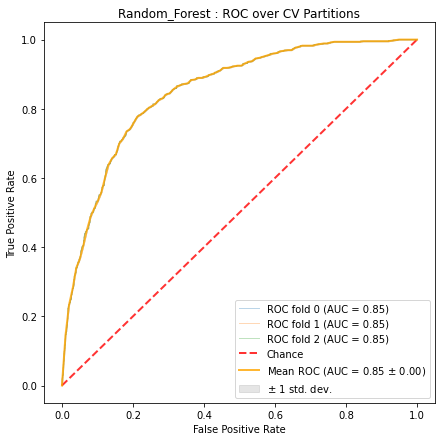

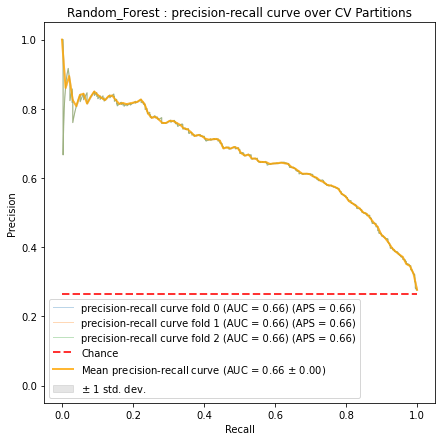

Avg. Model Balanced Accuracy = 0.7827740227181369 (std. dev. = 1.1102230246251565e-16)
Avg. Model Accuracy = 0.7832764505119454 (std. dev. = 0.0)
Avg. Model F1-Score = 0.6572199730094467 (std. dev. = 0.0)
Avg. Model Recall = 0.7817014446227929 (std. dev. = 0.0)
Avg. Model Specificity = 0.7838466008134807 (std. dev. = 1.1102230246251565e-16)
Avg. Model Precision = 0.5669383003492433 (std. dev. = 0.0)
Avg. Model True Positives = 487.0 (std. dev. = 0.0)
Avg. Model True Negatives = 1349.0 (std. dev. = 0.0)
Avg. Model False Positives = 372.0 (std. dev. = 0.0)
Avg. Model False Negatives = 136.0 (std. dev. = 0.0)
Avg. ROC AUC = 0.8499374640336587 (std. dev. = 1.1102230246251565e-16)
Avg. precision-recall curve AUC = 0.6626605353046682 (std. dev. = 0.0)
Avg. precision-recall curve Precision Score = 0.6633235814080988 (std. dev. = 0.0)


In [84]:
algorithm = 'Random_Forest'
if algorithm in considered_alg:
    start_time = time.time()
    algColor = algColors[considered_alg.index(algorithm)]
    mean_fpr, mean_tpr, mean_auc, mean_prec, mean_pr_auc, mean_ave_prec, FI_ave = Evaluate_FI(algorithm,ordered_feature_names,
        xTraining_list,yTraining_list,xTesting_list,yTesting_list,cv_num,global_ordered_features,randomSeed,param_grid,algColor,hype_cv,n_trials,best_hyperparameter,timeout)
    
    result_dict = {'algorithm':algorithm,'fpr':mean_fpr, 'tpr':mean_tpr, 'auc':mean_auc, 'prec':mean_prec, 'pr_auc':mean_pr_auc, 'ave_prec':mean_ave_prec}

    #Sort averages (decreasing order and print top 'n' and plot top 'n'
    names_scores = {'Names':ordered_feature_names, 'Scores':FI_ave} 
    ns = pd.DataFrame(names_scores)
    ns = ns.sort_values(by='Scores',ascending = False)

#### pickle dump

In [85]:
pickle.dump(result_dict, open('Random_Forest_pkl', 'wb'))

### Naive Bayes

In [86]:
def run_NB_full(x_train, y_train, x_test, y_test,i):
	#No hyperparameters to optimize.

	#Train model using 'best' hyperparameters - Uses default 3-fold internal CV (training/validation splits)
	clf = GaussianNB()
	model = clf.fit(x_train, y_train)

	#Prediction evaluation
	y_predict = clf.predict(x_test)

	metricList = Evaluate_results(y_test, y_predict, False)

	#Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
	probas_ = model.predict_proba(x_test)

	# Compute ROC curve and area the curve
	fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
	roc_auc = auc(fpr, tpr)

	# Compute Precision/Recall curve and AUC
	prec, recall, thresholds = metrics.precision_recall_curve(y_test, probas_[:, 1])
	prec, recall, thresholds = prec[::-1], recall[::-1], thresholds[::-1]
	prec_rec_auc = auc(recall, prec)
	ave_prec = metrics.average_precision_score(y_test, probas_[:, 1])

	#Feature Importance Estimates
	fi = computeImportances(clf, x_train, y_train, x_test, y_test, metricList[0])

	return metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

Running Naive_Bayes


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running Naive_Bayes


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running Naive_Bayes


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

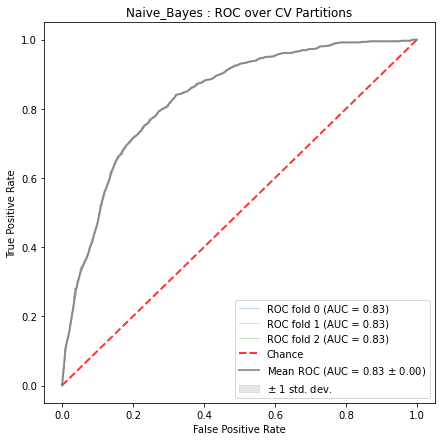

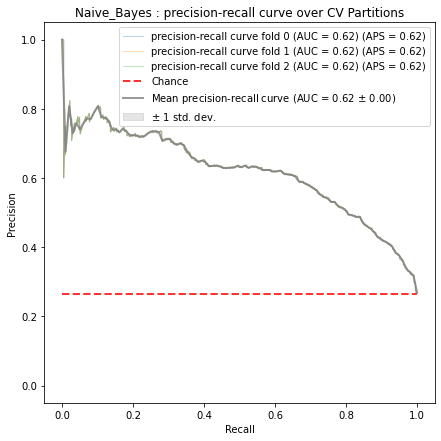

Avg. Model Balanced Accuracy = 0.7568157674576076 (std. dev. = 1.1102230246251565e-16)
Avg. Model Accuracy = 0.7662116040955631 (std. dev. = 0.0)
Avg. Model F1-Score = 0.6261937244201911 (std. dev. = 0.0)
Avg. Model Recall = 0.7367576243980739 (std. dev. = 1.1102230246251565e-16)
Avg. Model Specificity = 0.7768739105171413 (std. dev. = 1.1102230246251565e-16)
Avg. Model Precision = 0.5444839857651246 (std. dev. = 0.0)
Avg. Model True Positives = 459.0 (std. dev. = 0.0)
Avg. Model True Negatives = 1337.0 (std. dev. = 0.0)
Avg. Model False Positives = 384.0 (std. dev. = 0.0)
Avg. Model False Negatives = 164.0 (std. dev. = 0.0)
Avg. ROC AUC = 0.8313967858098851 (std. dev. = 0.0)
Avg. precision-recall curve AUC = 0.6162841145754026 (std. dev. = 0.0)
Avg. precision-recall curve Precision Score = 0.6171372625919843 (std. dev. = 0.0)


In [87]:
algorithm = 'Naive_Bayes'
if algorithm in considered_alg:
    start_time = time.time()
    algColor = algColors[considered_alg.index(algorithm)]
    mean_fpr, mean_tpr, mean_auc, mean_prec, mean_pr_auc, mean_ave_prec, FI_ave = Evaluate_FI(algorithm,ordered_feature_names,
        xTraining_list,yTraining_list,xTesting_list,yTesting_list,cv_num,global_ordered_features,randomSeed,param_grid,algColor,hype_cv,n_trials,best_hyperparameter,timeout)
    
    result_dict = {'algorithm':algorithm,'fpr':mean_fpr, 'tpr':mean_tpr, 'auc':mean_auc, 'prec':mean_prec, 'pr_auc':mean_pr_auc, 'ave_prec':mean_ave_prec}
        
    #Sort averages (decreasing order and print top 'n' and plot top 'n'
    names_scores = {'Names':ordered_feature_names, 'Scores':FI_ave} 
    ns = pd.DataFrame(names_scores)
    ns = ns.sort_values(by='Scores',ascending = False)

#### pickle dump

In [88]:
pickle.dump(result_dict, open('Naive_Bayes_pkl', 'wb'))

### XGBoost

In [89]:
def objective_XGB(trial, est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter):
	posInst = sum(y_train)
	negInst = len(y_train) - posInst
	classWeight = negInst/float(posInst)
	params = {'booster' : trial.suggest_categorical('booster',param_grid['booster']),
			  'objective' : trial.suggest_categorical('objective',param_grid['objective']),
			  'verbosity' : trial.suggest_categorical('verbosity',param_grid['verbosity']),
			  'reg_lambda' : trial.suggest_loguniform('reg_lambda', param_grid['reg_lambda'][0], param_grid['reg_lambda'][1]),
			  'alpha' : trial.suggest_loguniform('alpha', param_grid['alpha'][0], param_grid['alpha'][1]),
			  'eta' : trial.suggest_loguniform('eta', param_grid['eta'][0], param_grid['eta'][1]),
			  'gamma' : trial.suggest_loguniform('gamma', param_grid['gamma'][0], param_grid['gamma'][1]),
			  'max_depth' : trial.suggest_int('max_depth', param_grid['max_depth'][0], param_grid['max_depth'][1]),
			  'grow_policy' : trial.suggest_categorical('grow_policy',param_grid['grow_policy']),
			  'n_estimators' : trial.suggest_int('n_estimators',param_grid['n_estimators'][0], param_grid['n_estimators'][1]),
			  'min_samples_split' : trial.suggest_int('min_samples_split', param_grid['min_samples_split'][0], param_grid['min_samples_split'][1]),
			  'min_samples_leaf' : trial.suggest_int('min_samples_leaf', param_grid['min_samples_leaf'][0], param_grid['min_samples_leaf'][1]),
			  'subsample' : trial.suggest_uniform('subsample', param_grid['subsample'][0], param_grid['subsample'][1]),
			  'min_child_weight' : trial.suggest_loguniform('min_child_weight', param_grid['min_child_weight'][0], param_grid['min_child_weight'][1]),
			  'colsample_bytree' : trial.suggest_uniform('colsample_bytree', param_grid['colsample_bytree'][0], param_grid['colsample_bytree'][1]),
			  'scale_pos_weight' : trial.suggest_categorical('scale_pos_weight', [1.0, classWeight])}
	return hyper_eval(est, x_train, y_train, randSeed, hype_cv, params, best_hyperparameter)

In [90]:
def run_XGB_full(x_train, y_train, x_test, y_test,randSeed,i,param_grid, hype_cv, n_trials, best_hyperparameter,timeout,algorithm):
	#Run Hyperparameter sweep
	est = xgb.XGBClassifier()
	sampler = optuna.samplers.TPESampler(seed=randSeed)  # Make the sampler behave in a deterministic way.
	study = optuna.create_study(direction='maximize', sampler=sampler)
	optuna.logging.set_verbosity(optuna.logging.CRITICAL)
	study.optimize(lambda trial: objective_XGB(trial,est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter), n_trials=n_trials, timeout=timeout, catch=(ValueError,))

	fig = optuna.visualization.plot_parallel_coordinate(study)
    
	print('Best trial:')
	best_trial = study.best_trial
	print('  Value: ', best_trial.value)
	print('  Params: ')
	for key, value in best_trial.params.items():
		print('    {}: {}'.format(key, value))
	
	#Train model using 'best' hyperparameters
	est = xgb.XGBClassifier()
	clf = clone(est).set_params(**best_trial.params)  
	setattr(clf,'random_state',randSeed)

	model = clf.fit(x_train, y_train)

	#Prediction evaluation
	y_predict = clf.predict(x_test)

	metricList = Evaluate_results(y_test, y_predict, False)

	#Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
	probas_ = model.predict_proba(x_test)

	# Compute ROC curve and area the curve
	fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
	roc_auc = auc(fpr, tpr)

	# Compute Precision/Recall curve and AUC
	prec, recall, thresholds = metrics.precision_recall_curve(y_test, probas_[:, 1])
	prec, recall, thresholds = prec[::-1], recall[::-1], thresholds[::-1]
	prec_rec_auc = auc(recall, prec)
	ave_prec = metrics.average_precision_score(y_test, probas_[:, 1])

	#Feature Importance Estimates
	fi = computeImportances(clf, x_train, y_train, x_test, y_test, metricList[0])

	return metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

Running XGB
Best trial:
  Value:  0.7676017313932566
  Params: 
    booster: gbtree
    objective: binary:logistic
    verbosity: 0
    reg_lambda: 0.0054676996280358416
    alpha: 0.00011698579981093937
    eta: 0.0321494152892898
    gamma: 4.145679317227889e-06
    max_depth: 1
    grow_policy: depthwise
    n_estimators: 952
    min_samples_split: 50
    min_samples_leaf: 27
    subsample: 0.9788703282907242
    min_child_weight: 0.19170850529051917
    colsample_bytree: 0.2319864483900707
    scale_pos_weight: 2.7624398073836276


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running XGB
Best trial:
  Value:  0.7676017313932566
  Params: 
    booster: gbtree
    objective: binary:logistic
    verbosity: 0
    reg_lambda: 0.0054676996280358416
    alpha: 0.00011698579981093937
    eta: 0.0321494152892898
    gamma: 4.145679317227889e-06
    max_depth: 1
    grow_policy: depthwise
    n_estimators: 952
    min_samples_split: 50
    min_samples_leaf: 27
    subsample: 0.9788703282907242
    min_child_weight: 0.19170850529051917
    colsample_bytree: 0.2319864483900707
    scale_pos_weight: 2.7624398073836276


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running XGB
Best trial:
  Value:  0.7680036703505678
  Params: 
    booster: gbtree
    objective: binary:logistic
    verbosity: 0
    reg_lambda: 0.005091254165562454
    alpha: 9.437139103983057e-05
    eta: 0.042098887613501335
    gamma: 0.0033175439129213566
    max_depth: 1
    grow_policy: depthwise
    n_estimators: 917
    min_samples_split: 49
    min_samples_leaf: 35
    subsample: 0.9859857072823593
    min_child_weight: 0.16842986102513718
    colsample_bytree: 0.2158196161892215
    scale_pos_weight: 2.7624398073836276


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

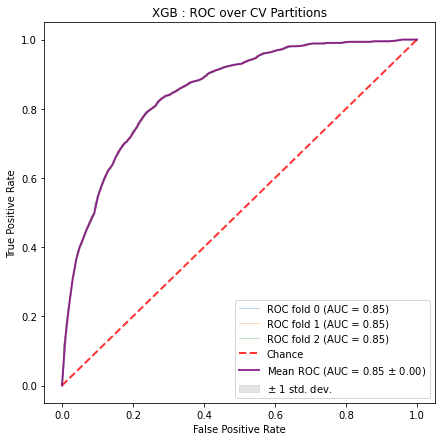

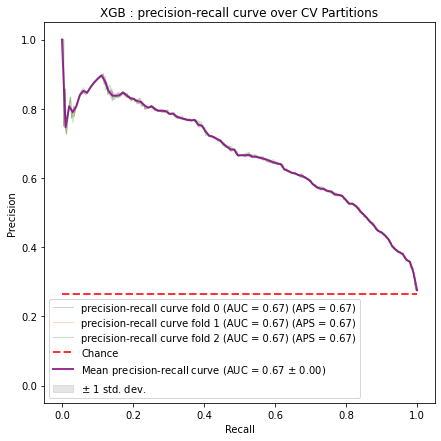

Avg. Model Balanced Accuracy = 0.7751245200990254 (std. dev. = 0.00013695657199037066)
Avg. Model Accuracy = 0.7667804323094426 (std. dev. = 0.0002011111436821968)
Avg. Model F1-Score = 0.64378807118276 (std. dev. = 0.00019779574659148792)
Avg. Model Recall = 0.7929373996789727 (std. dev. = 0.0)
Avg. Model Specificity = 0.757311640519078 (std. dev. = 0.000273913143980846)
Avg. Model Precision = 0.5418648615684839 (std. dev. = 0.00028028991814324294)
Avg. Model True Positives = 494.0 (std. dev. = 0.0)
Avg. Model True Negatives = 1303.3333333333333 (std. dev. = 0.4714045207910317)
Avg. Model False Positives = 417.6666666666667 (std. dev. = 0.4714045207910317)
Avg. Model False Negatives = 129.0 (std. dev. = 0.0)
Avg. ROC AUC = 0.8499562730118521 (std. dev. = 0.00010903765603086438)
Avg. precision-recall curve AUC = 0.6677929265488634 (std. dev. = 0.00022404757332103312)
Avg. precision-recall curve Precision Score = 0.6683447679727691 (std. dev. = 0.0002173717901520235)


In [91]:
algorithm = 'XGB'
if algorithm in considered_alg:
    start_time = time.time()
    algColor = algColors[considered_alg.index(algorithm)]
    mean_fbr, mean_tpr, mean_auc, mean_prec, mean_pr_auc, mean_ave_prec, FI_ave = Evaluate_FI(algorithm,ordered_feature_names,
        xTraining_list,yTraining_list,xTesting_list,yTesting_list,cv_num,global_ordered_features,randomSeed,param_grid,algColor,hype_cv,n_trials,best_hyperparameter,timeout)
    
    result_dict = {'algorithm':algorithm,'fbr':mean_fbr, 'tpr':mean_tpr, 'auc':mean_auc, 'prec':mean_prec, 'pr_auc':mean_pr_auc, 'ave_prec':mean_ave_prec}

    #Sort averages (decreasing order and print top 'n' and plot top 'n'
    names_scores = {'Names':ordered_feature_names, 'Scores':FI_ave} 
    ns = pd.DataFrame(names_scores)
    ns = ns.sort_values(by='Scores',ascending = False)

#### pickle dump

In [92]:
pickle.dump(result_dict, open('XGB_pkl', 'wb'))

### SVM

In [93]:
def objective_SVM(trial, est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter):
	params = {'kernel' : trial.suggest_categorical('kernel',param_grid['kernel']),
			  'C' : trial.suggest_loguniform('C', param_grid['C'][0], param_grid['C'][1]),
			  'gamma' : trial.suggest_categorical('gamma',param_grid['gamma']),
			  'degree' : trial.suggest_int('degree', param_grid['degree'][0], param_grid['degree'][1]),
			  'probability' : trial.suggest_categorical('probability',param_grid['probability']),
			  'class_weight' : trial.suggest_categorical('class_weight',param_grid['class_weight'])}
	return hyper_eval(est, x_train, y_train, randSeed, hype_cv, params, best_hyperparameter)
	
	


In [94]:
def run_SVM_full(x_train, y_train, x_test, y_test,randSeed,i,param_grid, hype_cv, n_trials, best_hyperparameter,timeout,algorithm):
	#Run Hyperparameter sweep
	est = SVC()
	sampler = optuna.samplers.TPESampler(seed=randSeed)  # Make the sampler behave in a deterministic way.
	study = optuna.create_study(direction='maximize', sampler=sampler)
	optuna.logging.set_verbosity(optuna.logging.CRITICAL)
	study.optimize(lambda trial: objective_SVM(trial,est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter), n_trials=n_trials, timeout=timeout, catch=(ValueError,))

	fig = optuna.visualization.plot_parallel_coordinate(study)

	print('Best trial:')
	best_trial = study.best_trial
	print('  Value: ', best_trial.value)
	print('  Params: ')
	for key, value in best_trial.params.items():
		print('    {}: {}'.format(key, value))
	
	#Train model using 'best' hyperparameters
	est = SVC()
	clf = clone(est).set_params(**best_trial.params)  
	setattr(clf,'random_state',randSeed)

	model = clf.fit(x_train, y_train)

	#Prediction evaluation
	y_predict = clf.predict(x_test)

	metricList = Evaluate_results(y_test, y_predict, False)

	#Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
	probas_ = model.predict_proba(x_test)

	# Compute ROC curve and area the curve
	fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
	roc_auc = auc(fpr, tpr)

	# Compute Precision/Recall curve and AUC
	prec, recall, thresholds = metrics.precision_recall_curve(y_test, probas_[:, 1])
	prec, recall, thresholds = prec[::-1], recall[::-1], thresholds[::-1]
	prec_rec_auc = auc(recall, prec)
	ave_prec = metrics.average_precision_score(y_test, probas_[:, 1])

	#Feature Importance Estimates
	fi = computeImportances(clf, x_train, y_train, x_test, y_test, metricList[0])

	return metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

Running SVM
Best trial:
  Value:  0.7495353163204349
  Params: 
    kernel: linear
    C: 54.56725485601472
    gamma: scale
    degree: 3
    probability: True
    class_weight: balanced


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running SVM
Best trial:
  Value:  0.7495353163204349
  Params: 
    kernel: linear
    C: 54.56725485601472
    gamma: scale
    degree: 3
    probability: True
    class_weight: balanced


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running SVM
Best trial:
  Value:  0.7495353163204349
  Params: 
    kernel: linear
    C: 54.56725485601472
    gamma: scale
    degree: 3
    probability: True
    class_weight: balanced


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

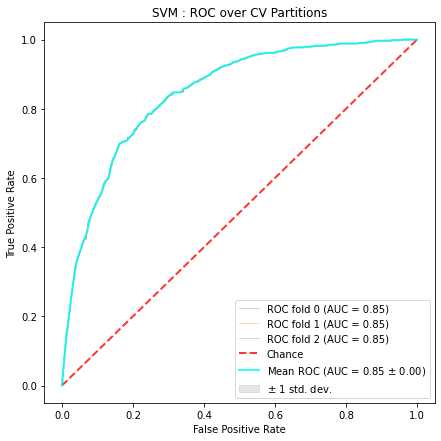

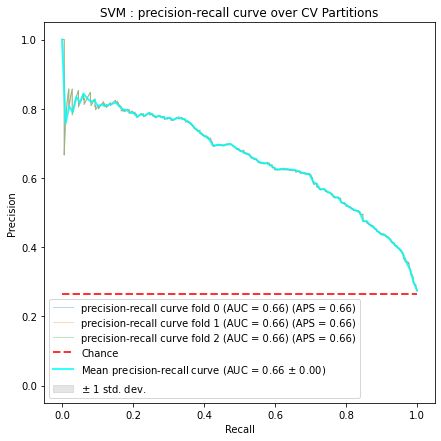

Avg. Model Balanced Accuracy = 0.7670453644573735 (std. dev. = 1.1102230246251565e-16)
Avg. Model Accuracy = 0.7534129692832764 (std. dev. = 1.1102230246251565e-16)
Avg. Model F1-Score = 0.6318471337579619 (std. dev. = 0.0)
Avg. Model Recall = 0.7961476725521669 (std. dev. = 0.0)
Avg. Model Specificity = 0.7379430563625798 (std. dev. = 0.0)
Avg. Model Precision = 0.5237592397043295 (std. dev. = 0.0)
Avg. Model True Positives = 496.0 (std. dev. = 0.0)
Avg. Model True Negatives = 1270.0 (std. dev. = 0.0)
Avg. Model False Positives = 451.0 (std. dev. = 0.0)
Avg. Model False Negatives = 127.0 (std. dev. = 0.0)
Avg. ROC AUC = 0.8468050696569523 (std. dev. = 0.0)
Avg. precision-recall curve AUC = 0.6568378934238411 (std. dev. = 0.0)
Avg. precision-recall curve Precision Score = 0.6574100811664977 (std. dev. = 0.0)


In [95]:
algorithm = 'SVM'
if algorithm in considered_alg:
    start_time = time.time()
    algColor = algColors[considered_alg.index(algorithm)]
    mean_fpr, mean_tpr, mean_auc, mean_prec, mean_pr_auc, mean_ave_prec, FI_ave = Evaluate_FI(algorithm,ordered_feature_names,
        xTraining_list,yTraining_list,xTesting_list,yTesting_list,cv_num,global_ordered_features,randomSeed,param_grid,algColor,hype_cv,n_trials,best_hyperparameter,timeout)
    
    result_dict = {'algorithm':algorithm,'fpr':mean_fpr, 'tpr':mean_tpr, 'auc':mean_auc, 'prec':mean_prec, 'pr_auc':mean_pr_auc, 'ave_prec':mean_ave_prec}

    #Sort averages (decreasing order and print top 'n' and plot top 'n'
    names_scores = {'Names':ordered_feature_names, 'Scores':FI_ave} 
    ns = pd.DataFrame(names_scores)
    ns = ns.sort_values(by='Scores',ascending = False)

#### pickle dump

In [96]:
pickle.dump(result_dict, open('SVM_pkl', 'wb'))

### Gradient Boosting Classifier

In [97]:
def objective_GB(trial, est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter):
	params = {'loss' : trial.suggest_categorical('loss',param_grid['loss']),
			  'learning_rate' : trial.suggest_loguniform('learning_rate', param_grid['learning_rate'][0], param_grid['learning_rate'][1]),
			  'min_samples_leaf' : trial.suggest_int('min_samples_leaf', param_grid['min_samples_leaf'][0], param_grid['min_samples_leaf'][1]),
			  'max_depth' : trial.suggest_int('max_depth', param_grid['max_depth'][0], param_grid['max_depth'][1]),
			  'max_leaf_nodes':param_grid['max_leaf_nodes'][0],
			  'tol':param_grid['tol'][0],
			  'n_iter_no_change' : trial.suggest_int('n_iter_no_change', param_grid['n_iter_no_change'][0], param_grid['n_iter_no_change'][1]),
			  'validation_fraction' : trial.suggest_discrete_uniform('validation_fraction', param_grid['validation_fraction'][0], param_grid['validation_fraction'][1], param_grid['validation_fraction'][2])}
	return hyper_eval(est, x_train, y_train, randSeed, hype_cv, params, best_hyperparameter)

In [98]:
def run_GB_full(x_train, y_train, x_test, y_test, randSeed, i, param_grid, hype_cv, n_trials,best_hyperparameter, timeout,algorithm):
	# Run Hyperparameter sweep
	est = GradientBoostingClassifier()
	sampler = optuna.samplers.TPESampler(seed=randSeed)  # Make the sampler behave in a deterministic way.
	study = optuna.create_study(direction='maximize', sampler=sampler)
	optuna.logging.set_verbosity(optuna.logging.CRITICAL)
	study.optimize(lambda trial: objective_GB(trial, est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter),n_trials=n_trials, timeout=timeout, catch=(ValueError,))

	fig = optuna.visualization.plot_parallel_coordinate(study)

	print('Best trial:')
	best_trial = study.best_trial
	print('  Value: ', best_trial.value)
	print('  Params: ')
	for key, value in best_trial.params.items():
		print('    {}: {}'.format(key, value))

	# Train model using 'best' hyperparameters
	est = GradientBoostingClassifier()
	clf = clone(est).set_params(**best_trial.params)
	setattr(clf, 'random_state', randSeed)

	model = clf.fit(x_train, y_train)

	# Prediction evaluation
	y_predict = clf.predict(x_test)

	metricList = Evaluate_results(y_test, y_predict, False)

	# Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
	probas_ = model.predict_proba(x_test)

	# Compute ROC curve and area the curve
	fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
	roc_auc = auc(fpr, tpr)

	# Compute Precision/Recall curve and AUC
	prec, recall, thresholds = metrics.precision_recall_curve(y_test, probas_[:, 1])
	prec, recall, thresholds = prec[::-1], recall[::-1], thresholds[::-1]
	prec_rec_auc = auc(recall, prec)
	ave_prec = metrics.average_precision_score(y_test, probas_[:, 1])

	# Feature Importance Estimates
	fi = clf.feature_importances_

	return metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

Running Gradient_Boosting
Best trial:
  Value:  0.7247424286481676
  Params: 
    loss: deviance
    learning_rate: 0.12718917111068836
    min_samples_leaf: 189
    max_depth: 7
    n_iter_no_change: 18
    validation_fraction: 0.24000000000000002
Running Gradient_Boosting
Best trial:
  Value:  0.7247424286481676
  Params: 
    loss: deviance
    learning_rate: 0.12718917111068836
    min_samples_leaf: 189
    max_depth: 7
    n_iter_no_change: 18
    validation_fraction: 0.24000000000000002
Running Gradient_Boosting
Best trial:
  Value:  0.7247424286481676
  Params: 
    loss: deviance
    learning_rate: 0.12718917111068836
    min_samples_leaf: 189
    max_depth: 7
    n_iter_no_change: 18
    validation_fraction: 0.24000000000000002


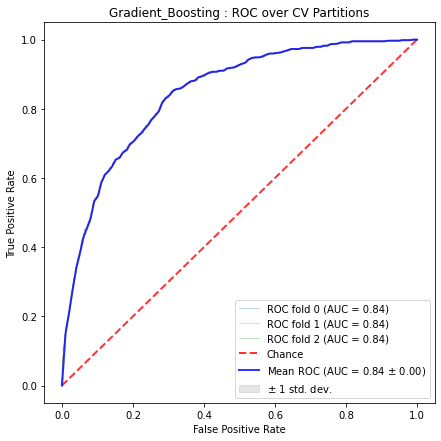

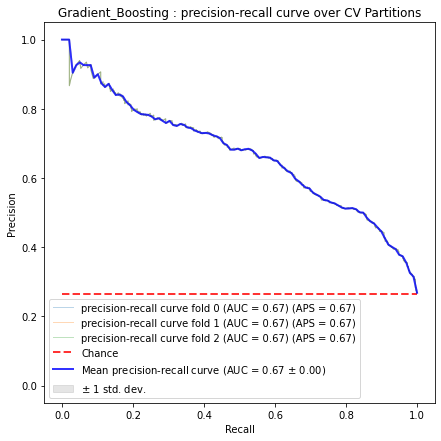

Avg. Model Balanced Accuracy = 0.7014110464351702 (std. dev. = 0.0)
Avg. Model Accuracy = 0.8029010238907851 (std. dev. = 1.1102230246251565e-16)
Avg. Model F1-Score = 0.5666041275797372 (std. dev. = 0.0)
Avg. Model Recall = 0.48475120385232745 (std. dev. = 0.0)
Avg. Model Specificity = 0.9180708890180128 (std. dev. = 0.0)
Avg. Model Precision = 0.6817155756207675 (std. dev. = 0.0)
Avg. Model True Positives = 302.0 (std. dev. = 0.0)
Avg. Model True Negatives = 1580.0 (std. dev. = 0.0)
Avg. Model False Positives = 141.0 (std. dev. = 0.0)
Avg. Model False Negatives = 321.0 (std. dev. = 0.0)
Avg. ROC AUC = 0.8441226917419881 (std. dev. = 1.1102230246251565e-16)
Avg. precision-recall curve AUC = 0.6683467433874771 (std. dev. = 0.0)
Avg. precision-recall curve Precision Score = 0.6686406471181594 (std. dev. = 0.0)


In [99]:
algorithm = 'Gradient_Boosting'
if algorithm in considered_alg:
    start_time = time.time()
    algColor = algColors[considered_alg.index(algorithm)]
    mean_fpr, mean_tpr, mean_auc, mean_prec, mean_pr_auc, mean_ave_prec, FI_ave = Evaluate_FI(algorithm,ordered_feature_names,
        xTraining_list,yTraining_list,xTesting_list,yTesting_list,cv_num,global_ordered_features,randomSeed,param_grid,algColor,hype_cv,n_trials,best_hyperparameter,timeout)
    
    result_dict = {'algorithm':algorithm,'fpr':mean_fpr, 'tpr':mean_tpr, 'auc':mean_auc, 'prec':mean_prec, 'pr_auc':mean_pr_auc, 'ave_prec':mean_ave_prec}

    #Sort averages (decreasing order and print top 'n' and plot top 'n'
    names_scores = {'Names':ordered_feature_names, 'Scores':FI_ave} 
    ns = pd.DataFrame(names_scores)
    ns = ns.sort_values(by='Scores',ascending = False)

#### pickle dump

In [100]:
pickle.dump(result_dict, open('Gradient_Boosting_pkl', 'wb'))

### K-Neighbors Classifier

In [101]:
def objective_KN(trial, est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter):
	params = {'n_neighbors': trial.suggest_int('n_neighbors', param_grid['n_neighbors'][0], param_grid['n_neighbors'][1]),
			  'weights' : trial.suggest_categorical('weights',param_grid['weights']),
			  'p': trial.suggest_int('p', param_grid['p'][0], param_grid['p'][1]),
			  'metric' : trial.suggest_categorical('metric',param_grid['metric'])}
	return hyper_eval(est, x_train, y_train, randSeed, hype_cv, params, best_hyperparameter)

In [102]:
def run_KN_full(x_train, y_train, x_test, y_test, randSeed, i, param_grid, hype_cv, n_trials,best_hyperparameter, timeout,algorithm):
	# Run Hyperparameter sweep
	est = KNeighborsClassifier()
	sampler = optuna.samplers.TPESampler(seed=randSeed)  # Make the sampler behave in a deterministic way.
	study = optuna.create_study(direction='maximize', sampler=sampler)
	optuna.logging.set_verbosity(optuna.logging.CRITICAL)
	study.optimize(lambda trial: objective_KN(trial, est, x_train, y_train, randSeed, hype_cv, param_grid, best_hyperparameter),n_trials=n_trials, timeout=timeout, catch=(ValueError,))

	fig = optuna.visualization.plot_parallel_coordinate(study)

	print('Best trial:')
	best_trial = study.best_trial
	print('  Value: ', best_trial.value)
	print('  Params: ')
	for key, value in best_trial.params.items():
		print('    {}: {}'.format(key, value))

	# Train model using 'best' hyperparameters
	est = KNeighborsClassifier()
	clf = clone(est).set_params(**best_trial.params)

	model = clf.fit(x_train, y_train)

	# Prediction evaluation
	y_predict = clf.predict(x_test)

	metricList = Evaluate_results(y_test, y_predict, False)

	# Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
	probas_ = model.predict_proba(x_test)

	# Compute ROC curve and area the curve
	fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
	roc_auc = auc(fpr, tpr)

	# Compute Precision/Recall curve and AUC
	prec, recall, thresholds = metrics.precision_recall_curve(y_test, probas_[:, 1])
	prec, recall, thresholds = prec[::-1], recall[::-1], thresholds[::-1]
	prec_rec_auc = auc(recall, prec)
	ave_prec = metrics.average_precision_score(y_test, probas_[:, 1])

	# Feature Importance Estimates
	fi = computeImportances(clf, x_train, y_train, x_test, y_test, metricList[0])

	return metricList, fpr, tpr, roc_auc, prec, recall, prec_rec_auc, ave_prec, fi

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

Running K_Neighbors
Best trial:
  Value:  0.7213587710090144
  Params: 
    n_neighbors: 45
    weights: uniform
    p: 1
    metric: minkowski


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running K_Neighbors
Best trial:
  Value:  0.7213587710090144
  Params: 
    n_neighbors: 45
    weights: uniform
    p: 1
    metric: minkowski


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

Running K_Neighbors
Best trial:
  Value:  0.7213587710090144
  Params: 
    n_neighbors: 45
    weights: uniform
    p: 1
    metric: minkowski


1st loop:   0%|          | 0/38 [00:00<?, ?it/s]

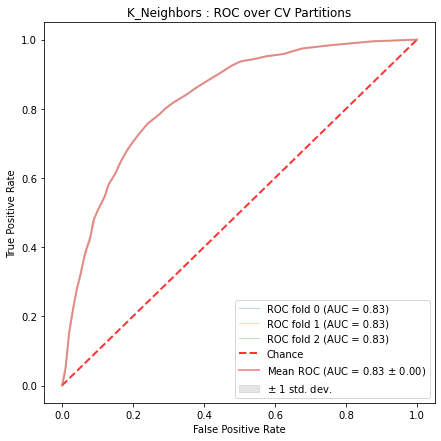

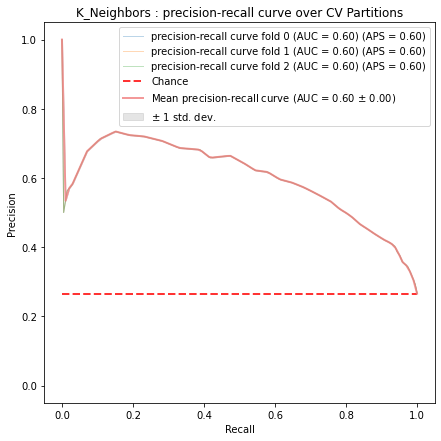

Avg. Model Balanced Accuracy = 0.7122217009596309 (std. dev. = 1.1102230246251565e-16)
Avg. Model Accuracy = 0.7909556313993175 (std. dev. = 0.0)
Avg. Model F1-Score = 0.5804794520547945 (std. dev. = 0.0)
Avg. Model Recall = 0.5441412520064205 (std. dev. = 0.0)
Avg. Model Specificity = 0.8803021499128413 (std. dev. = 1.1102230246251565e-16)
Avg. Model Precision = 0.6220183486238532 (std. dev. = 0.0)
Avg. Model True Positives = 339.0 (std. dev. = 0.0)
Avg. Model True Negatives = 1515.0 (std. dev. = 0.0)
Avg. Model False Positives = 206.0 (std. dev. = 0.0)
Avg. Model False Negatives = 284.0 (std. dev. = 0.0)
Avg. ROC AUC = 0.8299147626851013 (std. dev. = 0.0)
Avg. precision-recall curve AUC = 0.5994612200905345 (std. dev. = 0.0)
Avg. precision-recall curve Precision Score = 0.5968672765598421 (std. dev. = 0.0)


In [103]:
algorithm = 'K_Neighbors'
if algorithm in considered_alg:
    start_time = time.time()
    algColor = algColors[considered_alg.index(algorithm)]
    mean_fbr, mean_tpr, mean_auc, mean_prec, mean_pr_auc, mean_ave_prec, FI_ave = Evaluate_FI(algorithm,ordered_feature_names,
        xTraining_list,yTraining_list,xTesting_list,yTesting_list,cv_num,global_ordered_features,randomSeed,param_grid,algColor,hype_cv,n_trials,best_hyperparameter,timeout)
    
    result_dict = {'algorithm':algorithm,'Falsle_positive_rate':mean_fpr, 'tpr':mean_tpr, 'auc':mean_auc, 'prec':mean_prec, 'pr_auc':mean_pr_auc, 'ave_prec':mean_ave_prec}

    #Sort averages (decreasing order and print top 'n' and plot top 'n'
    names_scores = {'Names':ordered_feature_names, 'Scores':FI_ave} 
    ns = pd.DataFrame(names_scores)
    ns = ns.sort_values(by='Scores',ascending = False)

#### pickle dump

In [112]:
pickle.dump(result_dict, open('K_Neighbors_pkl', 'wb'))

### Step 11 - Summary and observations

#### Working directory path automatically detected

In [113]:
wd_path = os.getcwd()
wd_path = wd_path.replace('\\','/')
wd_path = wd_path+'/'
print("Working Directory: "+wd_path)

Working Directory: C:/Users/Nikhila KG/


#### Load pickle files of results

In [115]:
result_table = []

for algorithm in considered_alg:
    tempDict = pickle.load(open(wd_path+algorithm+'_pkl', 'rb'))
    result_table.append(tempDict)
    
result_table = pd.DataFrame.from_dict(result_table)

result_table

,algorithm,fpr,tpr,auc,prec,pr_auc,ave_prec,fbr,Falsle_positive_rate
0,Logistic_Regression,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.11717495987158909, 0.20385232744783308...",0.844245,"[1.0, 0.8623737373737373, 0.7586155674390969, ...",0.652736,0.653018,NaN,NaN
1,Decision_Tree,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.10531640644000195, 0.21368311255951702...",0.826825,"[1.0, 0.9817912925551816, 0.9635825851103629, ...",0.643239,0.631156,NaN,NaN
2,Random_Forest,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.14606741573033707, 0.23434991974317818...",0.849868,"[1.0, 0.8602693602693603, 0.8946408529741863, ...",0.663913,0.663324,NaN,NaN
3,Naive_Bayes,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.10914927768860354, 0.15409309791332262...",0.831208,"[1.0, 0.6764309764309764, 0.8073232323232323, ...",0.616030,0.617137,NaN,NaN
4,XGB,NaN,"[0.0, 0.14232209737827714, 0.23274478330658108...",0.849488,"[1.0, 0.7466712580348944, 0.8073232323232323, ...",0.667741,0.668345,"[0.0, 0.010101010101010102, 0.0202020202020202...",NaN
5,SVM,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.12038523274478331, 0.20545746388443017...",0.846762,"[1.0, 0.7581369248035915, 0.8073232323232323, ...",0.655899,0.657410,NaN,NaN
6,Gradient_Boosting,"[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.1508828250401284, 0.21187800963081863,...",0.843750,"[1.0, 1.0, 1.0, 0.9041847041847042, 0.92638020...",0.668720,0.668641,NaN,NaN
7,K_Neighbors,NaN,"[0.0, 0.05176159670541694, 0.15357131802484203...",0.829906,"[1.0, 0.5343013468013468, 0.5697295536005214, ...",0.600739,0.596867,NaN,"[0.0, 0.010101010101010102, 0.0202020202020202..."


-------------------